# GROUP 2: FINSCOPE TANZANIA DATA SCIENCE CAPSTONE PROJECT



### This notebook is the third document in the Project that includes the main project literature and the project proposal presentation. 

We are using this notebook to go through and document the steps for addressing our Project objectives, answering the Problem question and communicate our results, following Data Science concepts, tools and techniques.

## Project activities covered in this notebook

These activities go through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


## Question and problem definition

FinScope Tanzania is a comprehensive financial sector demand-side survey of Tanzanian adults aged 16 years and above. It provides an understanding of the financial services uptake landscape across the country and is a reliable measure for demand and usage of financial services across various population segments.

Further, FinScope Tanzania's insights clearly present barriers and levers to financial inclusion.

    > Based on the FinScope Tanzania 2023 datasets, our Project aims to determine the predictability of financial inclusion through the level of access to digital infrastructure and usage. 

    > We will use the dataset to extract features that will adequately inform the level of access digital infrastructure/usage of the sampled population.

    > Finally evaluate how good or bad a predictor of financial inclusion this outcome variable truely is.


## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** To understand which features within the dataset, statistically, contribute significantly to our project goal? Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, we may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. We will look to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** We will definately create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

## Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the entire main dataset into Pandas DataFrames. We then split this dataset into our training and testing datasets to ensure we do not get biased result and a model that generalizes poorly

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
main_df = pd.read_csv('../udsm-python-programs/FinScope Tanzania 2023 Data_Published/Individual Main Data/FinScope Tanzania 2023_Individual Main Data_FINAL.csv')
main_df

,SN,reg_name,reg_code,dist_code,dist_name,ward_code1,ward_name,ea_code,clustertype,c1,c2,c7,c8c,c9,c10,c11,c8n_a1,c8n_a2,c8n_b1,c8n_b2,c8n_c1,c8n_c2,c8n_d1,c8n_d2,c8n_e1,c8n_e2,c8n_f1,c8n_f2,c12_1,c12_2,c12_3,c12_4,c22,c14,c15,C16,c16_unit,c17_1__1,c17_1__2,c17_1__3,c17_1__4,c17_1__5,c17_1__6,c17_1__7,c17_1__8,c17_1__9,c17_1__10,c17_1__11,c18_1__1,c18_1__2,c18_1__3,c18_1__4,c18_1__5,c18_1__6,c18_1__7,c18_1__8,c18_1__9,c18_1__10,c18_1__11,c18_1__12,c18_2,c19,c20_1,c20_2,c23__1,c23__2,c23__3,c24_2,c24_2a,C24_3,c24_1,c25__1,c25__2,c25X1__1,c25X1__3,c25X1__4,c25X1__5,c25X1__6,c25X2__1,c25X2__2,c25X2__3,c25X2__4,c25X2__5,c25X2__6,c26,c27__1,c27__2,c27__3,c27__4,c27__5,c27__6,c27__7,c27__8,c27__9,c27__10,c27__11,c27__12,c27__13,c27__14,c27__15,c27__16,c27__18,c27__19,c27__20,c27__17,D_1,D2_1__1,D2_1__2,D2_1__3,D2_1__4,D2_1__5,D2_1__6,D2_1__7,D2_1__8,D2_1__9,D2_1__10,D2_1__11,D2_1__12,D2_4,D3_1,D3_2,D4,D5,D5a,D5b,D6_1_1,D6_1_2,D6_1_3,D6_2,D6_3,D6_3a__1,D6_3a__2,D6_3a__3,D6_3a__4,D6_3a__5,D6_3a__6,D6_3a__7,D6_3a__8,D6_4,D6_4a,D6_4b,D6_4c__1,D6_4c__2,D6_4c__3,D6_4c__4,D6_4c__5,D6_4c__6,D6_4c__7,D6_4c__8,D6_4c__9,D6_4c__10,D7,D7a,D7b,D7c,D7d,e_1_1,e_1_1new,e_2,e_3_3__1,e_3_3__2,e_3_3__3,e_3_3__4,e_3_3__5,e_3_3__6,e_3_3__7,e_3_3__8,e_3_3__9,e_3_3__11,e_3_3__12,e_3_3__13,e_3_3__14,e_3_3__15,e_3_3__16,e_4,e_4n,e_5_1,e_5_2,e_5_n_1,e_5_n_2,e_6,e_7,e_7_n_1__1,e_7_n_1__2,e_7_n_1__3,e_7_n_1__4,e_7_n_1__5,e_7_n_1__6,e_7_n_1__7,e_7_n_1__8,e_7_n_1__9,e_7_n_1__10,e_7_n_2,e_7_n_3,e_7_n_4,e_10,e_11_1,e_11_2,e_11_2_n_1,e_11_2_n_2,e_11_2_n_3,e_12_1,e_12_2,e_12_4,e_13,E14_1__1,E14_1__2,E14_1__3,E14_1__4,E14_1__5,E14_1__6,f_2,f_3_1_1,f_3_1_2,f_3_2_1__1,f_3_2_1__2,f_3_2_1__3,f_3_2_1__4,f_3_2_1__5,f_3_2_1__6,f_3_2_1__7,f_3_2_1__8,f_3_2_1__9,f_3_2_2,F4_1__1,F4_1__2,F4_1__3,F4_1__4,F4_1__5,F4_1__6,F4_1__7,F4_1__8,F4_1__9,F4_1__10,F4_1__11,F4_1__12,F4_1__13,F4_1__14,F4_4,F4_5,f_5,f_5_n_1__1,f_5_n_1__2,f_5_n_1__3,f_5_n_1__4,f_5_n_1__5,f_5_n_2__1,f_5_n_2__2,f_5_n_2__3,f_5_n_2__4,f_5_n_2__5,f_7_1,f_7_2,f_8_1,f_8_2,f_9,g_1_1_1,g_1_1_4,g_1_1_7,g_1_1_8,g_1_2_1__1,g_1_2_1__2,g_1_2_1__3,g_1_2_1__4,g_1_2_1__5,g_1_2_1__6,g_1_2_1__7,g_1_2_1__8,g_1_2_1__9,g_1_2_1__10,g_1_2_2,g_2_1_1,g_2_1_2,g_2_2,g_2_3,g_2_4,g_2_5,g_2_6,g_2_6n,g_4,g_5_1__1,g_5_1__2,g_5_1__3,g_5_1__5,g_5_1__6,g_5_1__7,g_5_1__8,g_5_1__9,g_5_1__10,g_5_1__11,g_5_1__12,g_5_1__13,g_5_1__14,g_5_2__1,g_5_2__2,g_5_2__3,g_5_2__5,g_5_2__6,g_5_2__7,g_5_2__8,g_5_2__9,g_5_2__10,g_5_2__11,g_5_2__12,g_5_2__13,g_5_2__14,g_5_3,g_6,g_7,g_8_1,g_8_2,g_9,g_12_1,g_12_2,g_13_1,pay_1,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay2_1__1,pay2_1__2,pay2_1__3,pay2_1__4,pay2_1__5,pay2_1__6,pay2_1__7,pay3_1,pay4_1,pay5_1__1,pay5_1__2,pay5_1__3,pay5_1__4,pay5_1__5,pay5_1__6,pay5_1__7,pay6_1,pb1,pb2,pb3,pb4,pb5,pb2_1,pb2_2,pb2_3,pb2_4,pb2_5,pb2_6,pb3_1,pb3_2,pb3_3,pb3_4,pb4_1,pb4_2,pb4_3,pb4_4,pb4_5,pb4_6,pb4_7,gov_1__1,gov_1__2,gov_1__3,gov_1__4,gov_2__1,gov_2__2,gov_2__3,gov_2__4,gov_2__5,gov_2__6,gov_2__7,gov_3,bill_1,bill2_1,bill2_2,bill2_3,bill2_4,bill2_5,serv1_1__1,serv1_1__2,serv1_1__3,serv1_1__4,serv1_1__5,serv1_1__6,serv1_1__7,serv1_1__8,serv1_1__9,serv1_1__10,serv1_1__11,serv1_1__12,serv1_2,serv1_3,serv1_5,serv1_6,serv1_7__1,serv1_7__2,serv1_7__3,serv1_7__4,serv1_8,serv3_1,serv5_0,serv5_1,serv2_1__1,serv2_1__2,serv2_1__3,serv2_1__4,serv2_1__5,serv2_2,serv2_3,serv2_4,comm3_1,comm4_1,comm6_2,comm6_3,comm6_3a,comm7_1__1,comm7_1__2,comm7_1__3,comm7_1__4,comm7_1__5,comm7_2,comm8_1__1,comm8_1__2,comm8_1__3,comm8_1__4,comm8_1__5,comm8_1__6,comm8_1__7,comm8_1a__1,comm8_1a__3,comm8_1a__4,comm8_1a__5,comm8_1a__6,comm9_1,comm10_1,micro5_1,micro1_1,micro2_1__1,micro2_1__2,micro2_1__3,micro2_1__4,micro2_2,micro2_3,micro2_4,micro2_5,micro4_0,micro6_2,micro6_3,micro7_1__1,micro7_1__2,micro7_1__3,micro7_1__4,micro7_1__5,micro7_2,micro8_0__1,micro8_0__2,micro8_0__3,micro8_0__4,micro8_0__5,micro8_0__6,micro9_0,micro9_0a__1,micro9_0a__2,micro9_0a__3,micro9_0a__4,micro9_0a__6,micro10_0,cred1_1,cred1_2,cred2_1,cred3_1__1,cred3_1__2,cred3_1__3,cred3_1

## Which features are available in the dataset?

**Noting the feature names for directly manipulating or analyzing these.**

Pandas also helps describe the datasets answering following questions early in our project.

In [4]:
print(main_df.columns.values)

['SN' 'reg_name' 'reg_code' 'dist_code' 'dist_name' 'ward_code1'
 'ward_name' 'ea_code' 'clustertype' 'c1' 'c2' 'c7' 'c8c' 'c9' 'c10' 'c11'
 'c8n_a1' 'c8n_a2' 'c8n_b1' 'c8n_b2' 'c8n_c1' 'c8n_c2' 'c8n_d1' 'c8n_d2'
 'c8n_e1' 'c8n_e2' 'c8n_f1' 'c8n_f2' 'c12_1' 'c12_2' 'c12_3' 'c12_4' 'c22'
 'c14' 'c15' 'C16' 'c16_unit' 'c17_1__1' 'c17_1__2' 'c17_1__3' 'c17_1__4'
 'c17_1__5' 'c17_1__6' 'c17_1__7' 'c17_1__8' 'c17_1__9' 'c17_1__10'
 'c17_1__11' 'c18_1__1' 'c18_1__2' 'c18_1__3' 'c18_1__4' 'c18_1__5'
 'c18_1__6' 'c18_1__7' 'c18_1__8' 'c18_1__9' 'c18_1__10' 'c18_1__11'
 'c18_1__12' 'c18_2' 'c19' 'c20_1' 'c20_2' 'c23__1' 'c23__2' 'c23__3'
 'c24_2' 'c24_2a' 'C24_3' 'c24_1' 'c25__1' 'c25__2' 'c25X1__1' 'c25X1__3'
 'c25X1__4' 'c25X1__5' 'c25X1__6' 'c25X2__1' 'c25X2__2' 'c25X2__3'
 'c25X2__4' 'c25X2__5' 'c25X2__6' 'c26' 'c27__1' 'c27__2' 'c27__3'
 'c27__4' 'c27__5' 'c27__6' 'c27__7' 'c27__8' 'c27__9' 'c27__10' 'c27__11'
 'c27__12' 'c27__13' 'c27__14' 'c27__15' 'c27__16' 'c27__18' 'c27__19'
 'c27__20

### Importing the Dataset dictionary

- The dictionary is a datamap that provides attribute labels.

In [5]:
labels_df = pd.read_excel("../udsm-python-programs/FinScope Tanzania 2023 Data_Published/Individual Main Data/Individual Main Data_Datamap.xlsx")
labels_df

,Variable Information,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Variable,Position,Label,Measurement Level,Role,Column Width,Alignment,Print Format,Write Format
1,SN,1,Serial Number,Scale,Input,8,Right,F8,F8
2,reg_name,2,reg_name,Nominal,Input,16,Left,A16,A16
3,reg_code,3,reg_code,Nominal,Input,10,Right,F2,F2
4,dist_code,4,dist_code,Nominal,Input,11,Right,F6,F6
...,...,...,...,...,...,...,...,...,...
718,IncomeMain,718,Main Income Source,Nominal,Input,12,Right,F8.2,F8.2
719,BusO,719,Business Owner,Nominal,Input,10,Right,F8.2,F8.2
720,DEDICATED_FARMER,720,Dedicated farmer,Nominal,Input,18,Right,F2,F2
721,SMALLHOLDER_FARMER,721,Smallholder farmer,Nominal,Input,20,Right,F2,F2


### Initial Features Selection and Original Target variable  

- Making an initial selection of attributes linked to digital infrastructure access.

- Also including the FinScope "Inclusion" target variable for each sample/surveyed individual

In [6]:
df_rawFeatures = main_df[['c23__1', 'c23__2', 'c23__3', 'c24_2', 'c24_2a', 'c24_1', 'c25__1', 'c25__2', 
                          'c25X1__1', 'c25X1__3', 'c25X1__4', 'c25X2__1', 'c25X2__2', 'c25X2__3',
                          'c25X2__4']]
df_rawFeatures

,c23__1,c23__2,c23__3,c24_2,c24_2a,c24_1,c25__1,c25__2,c25X1__1,c25X1__3,c25X1__4,c25X2__1,c25X2__2,c25X2__3,c25X2__4
0,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,
1,No,No,No,No,,2,,,,,,,,,
2,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,
3,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,,,,
4,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,No,No,No,No,,2,,,,,,,,,
9911,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,,,,
9912,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No
9913,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,No,,,,


In [7]:
df_rawFeatures = pd.concat([df_rawFeatures, main_df[['MM', 'BANKED', 'fasx', 'overlapx']]], axis=1)
df_rawFeatures

,c23__1,c23__2,c23__3,c24_2,c24_2a,c24_1,c25__1,c25__2,c25X1__1,c25X1__3,c25X1__4,c25X2__1,c25X2__2,c25X2__3,c25X2__4,MM,BANKED,fasx,overlapx
0,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
1,No,No,No,No,,2,,,,,,,,,,Not MM,Not Banked,Other formal non-bank,informal AND formal
2,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
3,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
4,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,No,No,No,No,,2,,,,,,,,,,Not MM,Not Banked,Excluded,excluded
9911,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,,,,,Not MM,Not Banked,Excluded,excluded
9912,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,MM,Not Banked,Other formal non-bank,informal AND formal
9913,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,No,,,,,Not MM,Not Banked,Informal only,informal only


### Updating column codes with labels from the dictionary

- Giving our dataset column labels we can understand.

In [8]:
label_dict = labels_df.set_index("Variable Information")["Unnamed: 2"].to_dict()

In [9]:
print(label_dict)

{'Variable': 'Label', 'SN': 'Serial Number', 'reg_name': 'reg_name', 'reg_code': 'reg_code', 'dist_code': 'dist_code', 'dist_name': 'dist_name', 'ward_code1': 'ward_code', 'ward_name': 'ward_name', 'ea_code': 'ea_code', 'clustertype': 'Cluster type', 'c1': 'C1. Respondent status', 'c2': 'C2. Who is the head of this household?', 'c7': 'C7. What is the relationship of the head of the household to you?', 'c8c': 'Age', 'c9': 'C9. Respondent gender Interviewer to observe', 'c10': 'C10. Marital status: are you currently ...?', 'c11': 'C11. Highest level of education completed? Can read out', 'c8n_a1': 'C8N.A1.Do you have difficulty in  Visual Impairment /Seeing', 'c8n_a2': 'C8N.A2. Visual Impairment /Seeing', 'c8n_b1': 'C8N.B1. Do you have difficulty in  Hearing Impairment  - deaf in one or both ear', 'c8n_b2': 'C8N.B2.  Hearing Impairment  - deaf in one or both ears, difficulty hearing what', 'c8n_c1': 'C8N.C1. Do you have difficulty in   Communication  - speaking, being understood', 'c8n_c

In [10]:
label_rawFeatures = df_rawFeatures.rename(columns=label_dict)
label_rawFeatures.head(10)

,C23. Which of the following do you have access to?:Mobile phone,C23. Which of the following do you have access to?:Internet,C23. Which of the following do you have access to?:Laptop or desktop or tablet,C24.2. Do you own a SIM card that you can use at any time?,C24.2a. Is the SIM card you own registered biometrically to your own National ID,C24.1. Do you personally own a mobile phone?,C25. Is your phone a smart phone or a simple mobile phone?:Smart phone,C25. Is your phone a smart phone or a simple mobile phone?:Simple phone,C25X1. Which of these things do you do when using USSD menus?:Get information,C25X1. Which of these things do you do when using USSD menus?:Send or receive,C25X1. Which of these things do you do when using USSD menus?:Pay for things,C25X2. Which of these things are you using apps on your phone to do ?:Get information,C25X2. Which of these things are you using apps on your phone to do ?:Food deliveries,C25X2. Which of these things are you using apps on your phone to do ?:Send or receive,C25X2. Which of these things are you using apps on your phone to do ?:Pay for things,Mobile money,Banked,Financial Access Strand,Overlaps in Financial Access
0,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
1,No,No,No,No,,2,,,,,,,,,,Not MM,Not Banked,Other formal non-bank,informal AND formal
2,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
3,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
4,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
5,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,non-bank formal only
6,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
7,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
8,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Banked,Banked,all
9,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal


In [11]:
label_rawFeatures.shape

(9915, 19)

In [19]:
label_rawFeatures.to_csv("../udsm-python-programs/FinScope Tanzania 2023 Data_Published/Individual Main Data/Initial Raw Feature Selection.csv")
label_rawFeatures.to_excel("../udsm-python-programs/FinScope Tanzania 2023 Data_Published/Individual Main Data/Initial Raw Feature Selection.xlsx")

In [12]:
label_rawFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9915 entries, 0 to 9914
Data columns (total 19 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   C23. Which of the following do you have access  to?:Mobile phone                        9915 non-null   object
 1   C23. Which of the following do you have access  to?:Internet                            9915 non-null   object
 2   C23. Which of the following do you have access  to?:Laptop or desktop or tablet         9915 non-null   object
 3   C24.2. Do you own a SIM card that you can use at any time?                              9915 non-null   object
 4   C24.2a. Is the SIM card you own registered biometrically to your own National ID        9915 non-null   object
 5   C24.1. Do you personally own a mobile phone?                                

In [15]:
label_rawFeatures.describe(include=['O'])

,C23. Which of the following do you have access to?:Mobile phone,C23. Which of the following do you have access to?:Internet,C23. Which of the following do you have access to?:Laptop or desktop or tablet,C24.2. Do you own a SIM card that you can use at any time?,C24.2a. Is the SIM card you own registered biometrically to your own National ID,C24.1. Do you personally own a mobile phone?,C25. Is your phone a smart phone or a simple mobile phone?:Smart phone,C25. Is your phone a smart phone or a simple mobile phone?:Simple phone,C25X1. Which of these things do you do when using USSD menus?:Get information,C25X1. Which of these things do you do when using USSD menus?:Send or receive,C25X1. Which of these things do you do when using USSD menus?:Pay for things,C25X2. Which of these things are you using apps on your phone to do ?:Get information,C25X2. Which of these things are you using apps on your phone to do ?:Food deliveries,C25X2. Which of these things are you using apps on your phone to do ?:Send or receive,C25X2. Which of these things are you using apps on your phone to do ?:Pay for things,Mobile money,Banked,Financial Access Strand,Overlaps in Financial Access
count,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915,9915
unique,2,3,3,2,3,2,3,3,3,3,3,3,3,3,3,2,2,4,8
top,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,,,,,MM,Not Banked,Other formal non-bank,informal AND formal
freq,8477,7057,9291,7510,5120,7459,5839,6263,6697,5810,6377,8299,8299,8299,8299,7046,7880,5432,3175


### Initial Exploratory Dataset Analysis

- No samples with missing data (Nan values) within the Initial sample features selected.
- The data types of the attributes selected are object (string) type. ***Need to change this to further statistics, visualization and modelling***
- Columns C25X2 asking about smartphone apps can be dropped as they have large frequencies of empty responses

In [16]:
label_rawFeatures.columns

Index(['C23. Which of the following do you have access  to?:Mobile phone',
       'C23. Which of the following do you have access  to?:Internet',
       'C23. Which of the following do you have access  to?:Laptop or desktop or tablet',
       'C24.2. Do you own a SIM card that you can use at any time?',
       'C24.2a. Is the SIM card you own registered biometrically to your own National ID',
       'C24.1. Do you personally own a mobile phone?',
       'C25. Is your phone a smart phone or a simple mobile phone?:Smart phone',
       'C25. Is your phone a smart phone or a simple mobile phone?:Simple phone',
       'C25X1. Which of these things do you do when using  USSD  menus?:Get information',
       'C25X1. Which of these things do you do when using  USSD  menus?:Send or receive',
       'C25X1. Which of these things do you do when using  USSD  menus?:Pay for things',
       'C25X2. Which of these things are you using  apps on your phone to do ?:Get information',
       'C25X2. Which

In [17]:
label_rawFeatures.drop(columns=['C25X2. Which of these things are you using  apps on your phone to do ?:Get information',
                                'C25X2. Which of these things are you using  apps on your phone to do ?:Food deliveries',
                                'C25X2. Which of these things are you using  apps on your phone to do ?:Send or receive',
                                'C25X2. Which of these things are you using  apps on your phone to do ?:Pay for things',], inplace = True)
label_rawFeatures

,C23. Which of the following do you have access to?:Mobile phone,C23. Which of the following do you have access to?:Internet,C23. Which of the following do you have access to?:Laptop or desktop or tablet,C24.2. Do you own a SIM card that you can use at any time?,C24.2a. Is the SIM card you own registered biometrically to your own National ID,C24.1. Do you personally own a mobile phone?,C25. Is your phone a smart phone or a simple mobile phone?:Smart phone,C25. Is your phone a smart phone or a simple mobile phone?:Simple phone,C25X1. Which of these things do you do when using USSD menus?:Get information,C25X1. Which of these things do you do when using USSD menus?:Send or receive,C25X1. Which of these things do you do when using USSD menus?:Pay for things,Mobile money,Banked,Financial Access Strand,Overlaps in Financial Access
0,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,MM,Not Banked,Other formal non-bank,informal AND formal
1,No,No,No,No,,2,,,,,,Not MM,Not Banked,Other formal non-bank,informal AND formal
2,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,MM,Not Banked,Other formal non-bank,informal AND formal
3,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,MM,Not Banked,Other formal non-bank,informal AND formal
4,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,MM,Not Banked,Other formal non-bank,informal AND formal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,No,No,No,No,,2,,,,,,Not MM,Not Banked,Excluded,excluded
9911,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Not MM,Not Banked,Excluded,excluded
9912,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,MM,Not Banked,Other formal non-bank,informal AND formal
9913,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Not MM,Not Banked,Informal only,informal only


In [20]:
label_rawFeatures[['C23. Which of the following do you have access  to?:Mobile phone', 'Financial Access Strand']].groupby([
    'C23. Which of the following do you have access  to?:Mobile phone'
], as_index=False).mean().sort_values(by=['Financial Access Strand'], ascending=False)

TypeError: Could not convert Other formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankBankedBankedBankedBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankBankedOther formal non-bankBankedBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedBankedOther formal non-bankBankedBankedBankedBankedBankedOther formal non-bankOther formal non-bankBankedBankedOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedBankedOther formal non-bankBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankBankedBankedOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankBankedBankedOther formal non-bankBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankBankedOther formal non-bankOther formal non-bankBankedBankedExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedBankedOther formal non-bankExcludedExcludedExcludedInformal onlyInformal onlyInformal onlyOther formal non-bankOther formal non-bankInformal onlyExcludedExcludedInformal onlyExcludedOther formal non-bankInformal onlyOther formal non-bankOther formal non-bankExcludedInformal onlyExcludedExcludedExcludedExcludedOther formal non-bankExcludedInformal onlyInformal onlyInformal onlyExcludedInformal onlyOther formal non-bankExcludedExcludedExcludedOther formal non-bankInformal onlyOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankInformal onlyExcludedExcludedExcludedOther formal non-bankOther formal non-bankInformal onlyInformal onlyExcludedExcludedInformal onlyOther formal non-bankExcludedExcludedInformal onlyOther formal non-bankInformal onlyInformal onlyOther formal non-bankInformal onlyInformal onlyOther formal non-bankExcludedExcludedExcludedExcludedInformal onlyExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankExcludedExcludedExcludedInformal onlyInformal onlyInformal onlyOther formal non-bankExcludedInformal onlyExcludedOther formal non-bankExcludedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedBankedExcludedExcludedExcludedExcludedInformal onlyInformal onlyBankedInformal onlyExcludedBankedExcludedExcludedExcludedExcludedExcludedInformal onlyOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankInformal onlyExcludedOther formal non-bankExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedInformal onlyExcludedOther formal non-bankOther formal non-bankExcludedInformal onlyExcludedOther formal non-bankExcludedExcludedExcludedExcludedOther formal non-bankExcludedExcludedInformal onlyExcludedExcludedBankedExcludedOther formal non-bankInformal onlyExcludedExcludedOther formal non-bankExcludedBankedExcludedExcludedExcludedExcludedExcludedOther formal non-bankInformal onlyExcludedExcludedExcludedOther formal non-bankExcludedOther formal non-bankOther formal non-bankOther formal non-bankExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedExcludedInformal onlyExcludedBankedExcludedExcludedOther formal non-bankInformal onlyExcludedOther formal non-bankInformal onlyInformal onlyExcludedOther formal non-bankExcludedExcludedExcludedOther formal non-bankExcludedInformal onlyExcludedExcludedOther formal non-bankOther formal non-bankExcludedExcludedOther formal non-bankExcludedInformal onlyExcludedInformal onlyInformal onlyBankedInformal onlyInformal onlyExcludedBankedInformal onlyOther formal non-bankExcludedOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedExcludedInformal onlyExcludedExcludedExcludedInformal onlyExcludedBankedExcludedInformal onlyOther formal non-bankInformal onlyInformal onlyExcludedOther formal non-bankExcludedInformal onlyOther formal non-bankInformal onlyExcludedInformal onlyInformal onlyExcludedExcludedExcludedInformal onlyInformal onlyBankedExcludedOther formal non-bankExcludedExcludedOther formal non-bankOther formal non-bankInformal onlyOther formal non-bankBankedInformal onlyExcludedInformal onlyExcludedExcludedOther formal non-bankExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedExcludedBankedExcludedOther formal non-bankInformal onlyExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankInformal onlyOther formal non-bankExcludedInformal onlyExcludedOther formal non-bankExcludedInformal onlyExcludedExcludedOther formal non-bankInformal onlyExcludedExcludedOther formal non-bankExcludedOther formal non-bankExcludedBankedOther formal non-bankExcludedInformal onlyOther formal non-bankOther formal non-bankInformal onlyExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedExcludedExcludedExcludedOther formal non-bankExcludedInformal onlyOther formal non-bankOther formal non-bankInformal onlyExcludedExcludedExcludedOther formal non-bankInformal onlyOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankInformal onlyOther formal non-bankOther formal non-bankInformal onlyInformal onlyInformal onlyExcludedInformal onlyExcludedBankedOther formal non-bankOther formal non-bankInformal onlyBankedExcludedExcludedExcludedInformal onlyExcludedInformal onlyExcludedExcludedInformal onlyOther formal non-bankExcludedExcludedOther formal non-bankOther formal non-bankExcludedExcludedOther formal non-bankExcludedOther formal non-bankInformal onlyExcludedInformal onlyOther formal non-bankExcludedExcludedOther formal non-bankOther formal non-bankOther formal non-bankExcludedExcludedInformal onlyExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedExcludedInformal onlyOther formal non-bankOther formal non-bankOther formal non-bankInformal onlyOther formal non-bankOther formal non-bankExcludedExcludedOther formal non-bankExcludedExcludedBankedExcludedExcludedExcludedOther formal non-bankExcludedExcludedExcludedExcludedInformal onlyInformal onlyExcludedOther formal non-bankExcludedExcludedInformal onlyExcludedExcludedExcludedInformal onlyExcludedOther formal non-bankInformal onlyInformal onlyExcludedOther formal non-bankExcludedExcludedExcludedExcludedInformal onlyOther formal non-bankExcludedExcludedOther formal non-bankOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedInformal onlyOther formal non-bankInformal onlyOther formal non-bankExcludedExcludedOther formal non-bankExcludedExcludedExcludedInformal onlyExcludedOther formal non-bankExcludedInformal onlyInformal onlyExcludedExcludedExcludedInformal onlyInformal onlyOther formal non-bankOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedOther formal non-bankExcludedExcludedInformal onlyExcludedExcludedExcludedInformal onlyExcludedExcludedExcludedExcludedInformal onlyInformal onlyInformal onlyInformal onlyExcludedInformal onlyExcludedExcludedOther formal non-bankOther formal non-bankOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedOther formal non-bankInformal onlyBankedExcludedExcludedExcludedInformal onlyBankedInformal onlyOther formal non-bankExcludedExcludedOther formal non-bankBankedExcludedBankedExcludedInformal onlyBankedExcludedExcludedExcludedExcludedOther formal non-bankExcludedInformal onlyExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedBankedInformal onlyInformal onlyInformal onlyInformal onlyExcludedExcludedExcludedOther formal non-bankOther formal non-bankInformal onlyExcludedExcludedOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedInformal onlyOther formal non-bankExcludedOther formal non-bankExcludedExcludedOther formal non-bankInformal onlyOther formal non-bankBankedExcludedExcludedExcludedInformal onlyOther formal non-bankInformal onlyBankedOther formal non-bankExcludedExcludedExcludedOther formal non-bankExcludedInformal onlyExcludedInformal onlyInformal onlyInformal onlyOther formal non-bankOther formal non-bankInformal onlyExcludedExcludedExcludedBankedInformal onlyExcludedExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedExcludedInformal onlyExcludedInformal onlyExcludedExcludedExcludedInformal onlyExcludedInformal onlyInformal onlyOther formal non-bankExcludedOther formal non-bankExcludedOther formal non-bankExcludedOther formal non-bankExcludedInformal onlyOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedOther formal non-bankExcludedBankedOther formal non-bankInformal onlyExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyOther formal non-bankInformal onlyOther formal non-bankOther formal non-bankExcludedExcludedOther formal non-bankExcludedExcludedExcludedExcludedBankedOther formal non-bankInformal onlyOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedOther formal non-bankExcludedExcludedExcludedInformal onlyExcludedExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedExcludedOther formal non-bankExcludedOther formal non-bankExcludedExcludedBankedExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyOther formal non-bankExcludedOther formal non-bankExcludedExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedBankedExcludedInformal onlyInformal onlyInformal onlyBankedOther formal non-bankExcludedInformal onlyExcludedExcludedExcludedInformal onlyExcludedBankedExcludedExcludedExcludedExcludedExcludedInformal onlyOther formal non-bankExcludedInformal onlyOther formal non-bankExcludedInformal onlyExcludedExcludedExcludedInformal onlyBankedExcludedOther formal non-bankExcludedOther formal non-bankOther formal non-bankInformal onlyExcludedInformal onlyInformal onlyExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankExcludedExcludedOther formal non-bankExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankExcludedInformal onlyExcludedOther formal non-bankExcludedInformal onlyExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankInformal onlyOther formal non-bankExcludedExcludedInformal onlyInformal onlyOther formal non-bankExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedExcludedInformal onlyExcludedBankedOther formal non-bankOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedExcludedOther formal non-bankExcludedExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedExcludedInformal onlyExcludedBankedOther formal non-bankInformal onlyOther formal non-bankOther formal non-bankExcludedExcludedExcludedInformal onlyInformal onlyExcludedInformal onlyExcludedExcludedOther formal non-bankInformal onlyInformal onlyInformal onlyExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedInformal onlyExcludedExcludedExcludedOther formal non-bankExcludedInformal onlyBankedExcludedExcludedInformal onlyExcludedExcludedBankedOther formal non-bankOther formal non-bankOther formal non-bankExcludedExcludedInformal onlyInformal onlyExcludedExcludedOther formal non-bankExcludedExcludedExcludedOther formal non-bankExcludedExcludedBankedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedExcludedInformal onlyExcludedExcludedBankedExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedInformal onlyExcludedInformal onlyInformal onlyExcludedExcludedInformal onlyOther formal non-bankExcludedExcludedExcludedExcludedOther formal non-bankBankedInformal onlyExcludedExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyOther formal non-bankExcludedBankedOther formal non-bankExcludedExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedOther formal non-bankExcludedExcludedOther formal non-bankBankedExcludedExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedBankedExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedExcludedOther formal non-bankExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedOther formal non-bankInformal onlyExcludedExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedOther formal non-bankInformal onlyExcludedInformal onlyExcludedExcludedExcludedBankedExcludedExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedOther formal non-bankExcludedOther formal non-bankExcludedExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedInformal onlyExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankExcludedInformal onlyExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyInformal onlyExcludedExcludedExcludedInformal onlyBankedOther formal non-bankExcludedOther formal non-bankExcludedExcludedExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankInformal onlyOther formal non-bankExcludedExcludedExcludedOther formal non-bankExcludedOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedOther formal non-bankExcludedExcludedExcludedInformal onlyOther formal non-bankInformal onlyExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedInformal onlyExcludedExcludedExcludedInformal onlyOther formal non-bankExcludedBankedExcludedExcludedExcludedExcludedInformal onlyExcludedExcludedExcludedExcludedInformal onlyOther formal non-bankExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedInformal onlyExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedBankedExcludedExcludedExcludedOther formal non-bankInformal onlyExcludedInformal onlyOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedOther formal non-bankOther formal non-bankExcludedExcludedExcludedExcludedExcludedExcludedExcludedExcludedInformal onlyInformal onlyOther formal non-bankExcludedExcludedInformal onlyExcludedInformal onlyExcludedOther formal non-bankExcludedOther formal non-bankInformal onlyInformal onlyExcludedExcluded to numeric

### Convert Formats

We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the LabelEncoder and get_dummies functions from sklearn and pandas libraries we imported.

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.


In [18]:
#code categorical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label_rawFeatures['Mobile_phone'] = label.fit_transform(label_rawFeatures['C23. Which of the following do you have access  to?:Mobile phone'])
label_rawFeatures['Internet'] = label.fit_transform(label_rawFeatures['C23. Which of the following do you have access  to?:Internet'])
label_rawFeatures['PC'] = label.fit_transform(label_rawFeatures['C23. Which of the following do you have access  to?:Laptop or desktop or tablet'])
label_rawFeatures['Simcard'] = label.fit_transform(label_rawFeatures['C24.2. Do you own a SIM card that you can use at any time?'])
label_rawFeatures['NationalID'] = label.fit_transform(label_rawFeatures['C24.2a. Is the SIM card you own registered biometrically to your own National ID'])
label_rawFeatures['Own_phone'] = label.fit_transform(label_rawFeatures['C24.1. Do you personally own a mobile phone?'])
label_rawFeatures['Smart_phone'] = label.fit_transform(label_rawFeatures['C25. Is your phone a smart phone or a simple mobile phone?:Smart phone'])
label_rawFeatures['USSD_info'] = label.fit_transform(label_rawFeatures['C25X1. Which of these things do you do when using  USSD  menus?:Get information'])
label_rawFeatures['USSD_transfers'] = label.fit_transform(label_rawFeatures['C25X1. Which of these things do you do when using  USSD  menus?:Send or receive'])
label_rawFeatures['USSD_payments'] = label.fit_transform(label_rawFeatures['C25X1. Which of these things do you do when using  USSD  menus?:Pay for things'])
label_rawFeatures['Mobile_Money'] = label.fit_transform(label_rawFeatures['Mobile money'])
label_rawFeatures['Banked'] = label.fit_transform(label_rawFeatures['Banked'])
label_rawFeatures['Inclusion_code'] = label.fit_transform(label_rawFeatures['Financial Access Strand'])
label_rawFeatures['Overlap'] = label.fit_transform(label_rawFeatures['Overlaps in Financial Access'])


# #define x and y variables for dummy features original
# data1_dummy = pd.get_dummies(data1[data1_x])
# data1_x_dummy = data1_dummy.columns.tolist()
# data1_xy_dummy = Target + data1_x_dummy
# print('Dummy X Y: ', data1_xy_dummy, '\n')



# data1_dummy.head()
label_rawFeatures.head(10)

,C23. Which of the following do you have access to?:Mobile phone,C23. Which of the following do you have access to?:Internet,C23. Which of the following do you have access to?:Laptop or desktop or tablet,C24.2. Do you own a SIM card that you can use at any time?,C24.2a. Is the SIM card you own registered biometrically to your own National ID,C24.1. Do you personally own a mobile phone?,C25. Is your phone a smart phone or a simple mobile phone?:Smart phone,C25. Is your phone a smart phone or a simple mobile phone?:Simple phone,C25X1. Which of these things do you do when using USSD menus?:Get information,C25X1. Which of these things do you do when using USSD menus?:Send or receive,C25X1. Which of these things do you do when using USSD menus?:Pay for things,Mobile money,Banked,Financial Access Strand,Overlaps in Financial Access,Mobile_phone,Internet,PC,Simcard,NationalID,Own_phone,Smart_phone,USSD_info,USSD_transfers,USSD_payments,Mobile_Money,Inclusion_code,Overlap
0,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,MM,1,Other formal non-bank,informal AND formal,1,2,1,1,2,1,1,2,2,1,0,3,5
1,No,No,No,No,,2,,,,,,Not MM,1,Other formal non-bank,informal AND formal,0,1,1,0,0,0,0,0,0,0,1,3,5
2,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,MM,1,Other formal non-bank,informal AND formal,1,1,1,1,2,1,1,2,2,1,0,3,5
3,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,MM,1,Other formal non-bank,informal AND formal,1,1,1,1,1,1,1,2,2,1,0,3,5
4,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,MM,1,Other formal non-bank,informal AND formal,1,1,1,1,2,1,1,2,2,1,0,3,5
5,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,MM,1,Other formal non-bank,non-bank formal only,1,2,1,1,1,1,1,2,2,1,0,3,7
6,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,MM,1,Other formal non-bank,informal AND formal,1,1,1,1,1,1,1,2,2,1,0,3,5
7,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,MM,1,Other formal non-bank,informal AND formal,1,2,1,1,2,1,1,1,2,2,0,3,5
8,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,MM,0,Banked,all,1,1,1,1,2,1,1,2,2,1,0,0,1
9,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,MM,1,Other formal non-bank,informal AND formal,1,1,1,1,2,1,1,2,2,1,0,3,5


In [19]:
label_rawFeatures.iloc[:, 15:].tail(10)

,Mobile_phone,Internet,PC,Simcard,NationalID,Own_phone,Smart_phone,USSD_info,USSD_transfers,USSD_payments,Mobile_Money,Inclusion_code,Overlap
9905,0,1,1,0,0,0,0,0,0,0,1,2,6
9906,1,2,1,1,1,1,1,2,1,1,1,1,4
9907,1,2,1,1,2,1,1,2,1,1,1,2,6
9908,0,1,1,0,0,0,0,0,0,0,1,1,4
9909,1,2,1,1,1,1,2,2,2,1,0,0,1
9910,0,1,1,0,0,0,0,0,0,0,1,1,4
9911,1,1,1,1,2,1,1,2,1,1,1,1,4
9912,1,2,1,1,2,1,2,2,2,1,0,3,5
9913,1,1,1,1,1,1,1,2,1,1,1,2,6
9914,1,1,1,1,1,1,2,2,1,1,1,1,4


In [20]:
col_list = label_rawFeatures.iloc[:, 15:].columns.tolist()
col_list

['Mobile_phone',
 'Internet',
 'PC',
 'Simcard',
 'NationalID',
 'Own_phone',
 'Smart_phone',
 'USSD_info',
 'USSD_transfers',
 'USSD_payments',
 'Mobile_Money',
 'Inclusion_code',
 'Overlap']

In [22]:
#defining y variable aka target/outcome
target = ['Inclusion_code']

#defining x variables for 1st iteration of features aka feature selection
data_x = ['Mobile_phone','Internet', 'PC', 'Simcard','NationalID', 'Own_phone', 'Smart_phone', 'USSD_info', 'USSD_transfers', 'USSD_payments']

#defining x & y variables for dummy features in 1st iteration
data_dummy = pd.get_dummies(label_rawFeatures[data_x])
data_dummy_x = data_dummy.columns.tolist()
data_dummy_xy = data_dummy_x + target
print("Dummy X Y: ", data_dummy_xy, "\n")

data_dummy.head(20)

Dummy X Y:  ['Mobile_phone', 'Internet', 'PC', 'Simcard', 'NationalID', 'Own_phone', 'Smart_phone', 'USSD_info', 'USSD_transfers', 'USSD_payments', 'Inclusion_code'] 



,Mobile_phone,Internet,PC,Simcard,NationalID,Own_phone,Smart_phone,USSD_info,USSD_transfers,USSD_payments
0,1,2,1,1,2,1,1,2,2,1
1,0,1,1,0,0,0,0,0,0,0
2,1,1,1,1,2,1,1,2,2,1
3,1,1,1,1,1,1,1,2,2,1
4,1,1,1,1,2,1,1,2,2,1
5,1,2,1,1,1,1,1,2,2,1
6,1,1,1,1,1,1,1,2,2,1
7,1,2,1,1,2,1,1,1,2,2
8,1,1,1,1,2,1,1,2,2,1
9,1,1,1,1,2,1,1,2,2,1


In [23]:
# some weird results so must recheck for null/Nan values 
label_rawFeatures.isnull().sum()

C23. Which of the following do you have access  to?:Mobile phone                    0
C23. Which of the following do you have access  to?:Internet                        0
C23. Which of the following do you have access  to?:Laptop or desktop or tablet     0
C24.2. Do you own a SIM card that you can use at any time?                          0
C24.2a. Is the SIM card you own registered biometrically to your own National ID    0
C24.1. Do you personally own a mobile phone?                                        0
C25. Is your phone a smart phone or a simple mobile phone?:Smart phone              0
C25. Is your phone a smart phone or a simple mobile phone?:Simple phone             0
C25X1. Which of these things do you do when using  USSD  menus?:Get information     0
C25X1. Which of these things do you do when using  USSD  menus?:Send or receive     0
C25X1. Which of these things do you do when using  USSD  menus?:Pay for things      0
Mobile money                                          

## Analyze by pivoting features and statistics

Now that they are all numeric let us continue our EDA, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values.

- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [21]:
#Now let us the Correlation by Inclusion code of our selected features using group by aka pivot table
for x in data_dummy_x:
    print('Survival Correlation by:', x)
    print(label_rawFeatures[[x, target[0]]].groupby(x, as_index=False).mean().sort_values(by=target[0], ascending=False))
    print('-'*30, '\n')


Survival Correlation by: Mobile_phone
   Mobile_phone  Inclusion_code
1             1        2.007550
0             0        1.662031
------------------------------ 

Survival Correlation by: Internet
   Internet  Inclusion_code
1         1        2.067876
0         0        1.714286
2         2        1.684672
------------------------------ 

Survival Correlation by: PC
   PC  Inclusion_code
1   1        2.014638
0   0        1.444444
2   2        1.100813
------------------------------ 

Survival Correlation by: Simcard
   Simcard  Inclusion_code
1        1        2.031824
0        0        1.725156
------------------------------ 

Survival Correlation by: NationalID
   NationalID  Inclusion_code
1           1        2.264017
2           2        1.923437
0           0        1.725156
------------------------------ 

Survival Correlation by: Own_phone
   Own_phone  Inclusion_code
1          1        2.036466
0          0        1.717427
------------------------------ 

Survival Corre

In [22]:
#Difficult to understand the correlation as Inclusion Code has 4 discrete values, let us try Mobile Money which has binary values
for x in data_dummy_x:
    print('Financial Inclusion Correlation by:', x)
    print(label_rawFeatures[[x, 'Mobile_Money']].groupby(x, as_index=False).mean().sort_values(by='Mobile_Money', ascending=False))
    print('-'*30, '\n')
        

#then lets us see the correlation of Mobile_Money to our Target variable using crosstabulation
print(pd.crosstab(label_rawFeatures['Mobile_Money'], label_rawFeatures[target[0]]))

Financial Inclusion Correlation by: Mobile_phone
   Mobile_phone  Mobile_Money
0             0      0.737135
1             1      0.213401
------------------------------ 

Financial Inclusion Correlation by: Internet
   Internet  Mobile_Money
1         1      0.358934
0         0      0.285714
2         2      0.117152
------------------------------ 

Financial Inclusion Correlation by: PC
   PC  Mobile_Money
0   0      0.333333
1   1      0.304919
2   2      0.053659
------------------------------ 

Financial Inclusion Correlation by: Simcard
   Simcard  Mobile_Money
0        0      0.750104
1        1      0.141811
------------------------------ 

Financial Inclusion Correlation by: NationalID
   NationalID  Mobile_Money
0           0      0.750104
1           1      0.214644
2           2      0.107813
------------------------------ 

Financial Inclusion Correlation by: Own_phone
   Own_phone  Mobile_Money
0          0      0.747964
1          1      0.138356
-----------------------

### Some conclusions from our initial Exploratory Data Analysis

- **We observe significant correlation (>0.7) to our target variable among Mobile_phone, Simcard, NationalID, Smart_phone and USSD usage**. We decide to include these features in our model.
- **Not so much (<0.4) among the PC, tablet and Internet variables.** - We may decide to drop these or merge them before modeling
- **Most significant is that our Financial Inclusion variable has 4 discrete values: 0 - Banked, 1 - Excluded, 2 - Informal Only and 3 - Other formal Non Bank. It may be best to derive a new binary Inclusion feature from these individual values.** 
- **creating new Financial Inclusion feature by combining values 0 and 3 to indicated Inclusion while 1 and 2 to indicate Exclusion**.


In [50]:
data1 = label_rawFeatures.iloc[:, 15:]
data1

,Mobile_phone,Internet,PC,Simcard,NationalID,Own_phone,Smart_phone,USSD_info,USSD_transfers,USSD_payments,Mobile_Money,Inclusion_code,Overlap
0,1,2,1,1,2,1,1,2,2,1,0,3,5
1,0,1,1,0,0,0,0,0,0,0,1,3,5
2,1,1,1,1,2,1,1,2,2,1,0,3,5
3,1,1,1,1,1,1,1,2,2,1,0,3,5
4,1,1,1,1,2,1,1,2,2,1,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,0,1,1,0,0,0,0,0,0,0,1,1,4
9911,1,1,1,1,2,1,1,2,1,1,1,1,4
9912,1,2,1,1,2,1,2,2,2,1,0,3,5
9913,1,1,1,1,1,1,1,2,1,1,1,2,6


In [51]:
data1.loc[ data1['Inclusion_code'] == 3, 'Inclusion_code'] = 0
data1.loc[ data1['Inclusion_code'] == 2, 'Inclusion_code'] = 1
data1

,Mobile_phone,Internet,PC,Simcard,NationalID,Own_phone,Smart_phone,USSD_info,USSD_transfers,USSD_payments,Mobile_Money,Inclusion_code,Overlap
0,1,2,1,1,2,1,1,2,2,1,0,0,5
1,0,1,1,0,0,0,0,0,0,0,1,0,5
2,1,1,1,1,2,1,1,2,2,1,0,0,5
3,1,1,1,1,1,1,1,2,2,1,0,0,5
4,1,1,1,1,2,1,1,2,2,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,0,1,1,0,0,0,0,0,0,0,1,1,4
9911,1,1,1,1,2,1,1,2,1,1,1,1,4
9912,1,2,1,1,2,1,2,2,2,1,0,0,5
9913,1,1,1,1,1,1,1,2,1,1,1,1,6


<a id="ch6"></a>
## Let's Perform Some Exploratory Analysis with Visualizations
Now that our data is cleaned, we will explore our data with graphs and plots to visualize our variables with the hope of further classifying features and determining their correlation with the target variable and each other.

We will use matplotlip.pyplot and seaborn 

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

**Observations.**

- Mobile_phone.
- NationalID.
- Internet.
- Inclusion_code.

- pair plots of entire dataset

- correlation heatmap of dataset

**Decisions.**

- 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


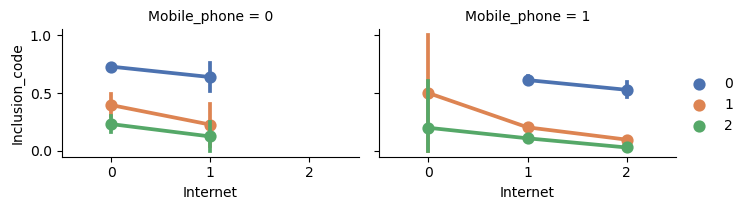

In [25]:
grid = sns.FacetGrid(data, col='Mobile_phone', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Internet', 'Inclusion_code', 'NationalID', palette='deep')
grid.add_legend()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


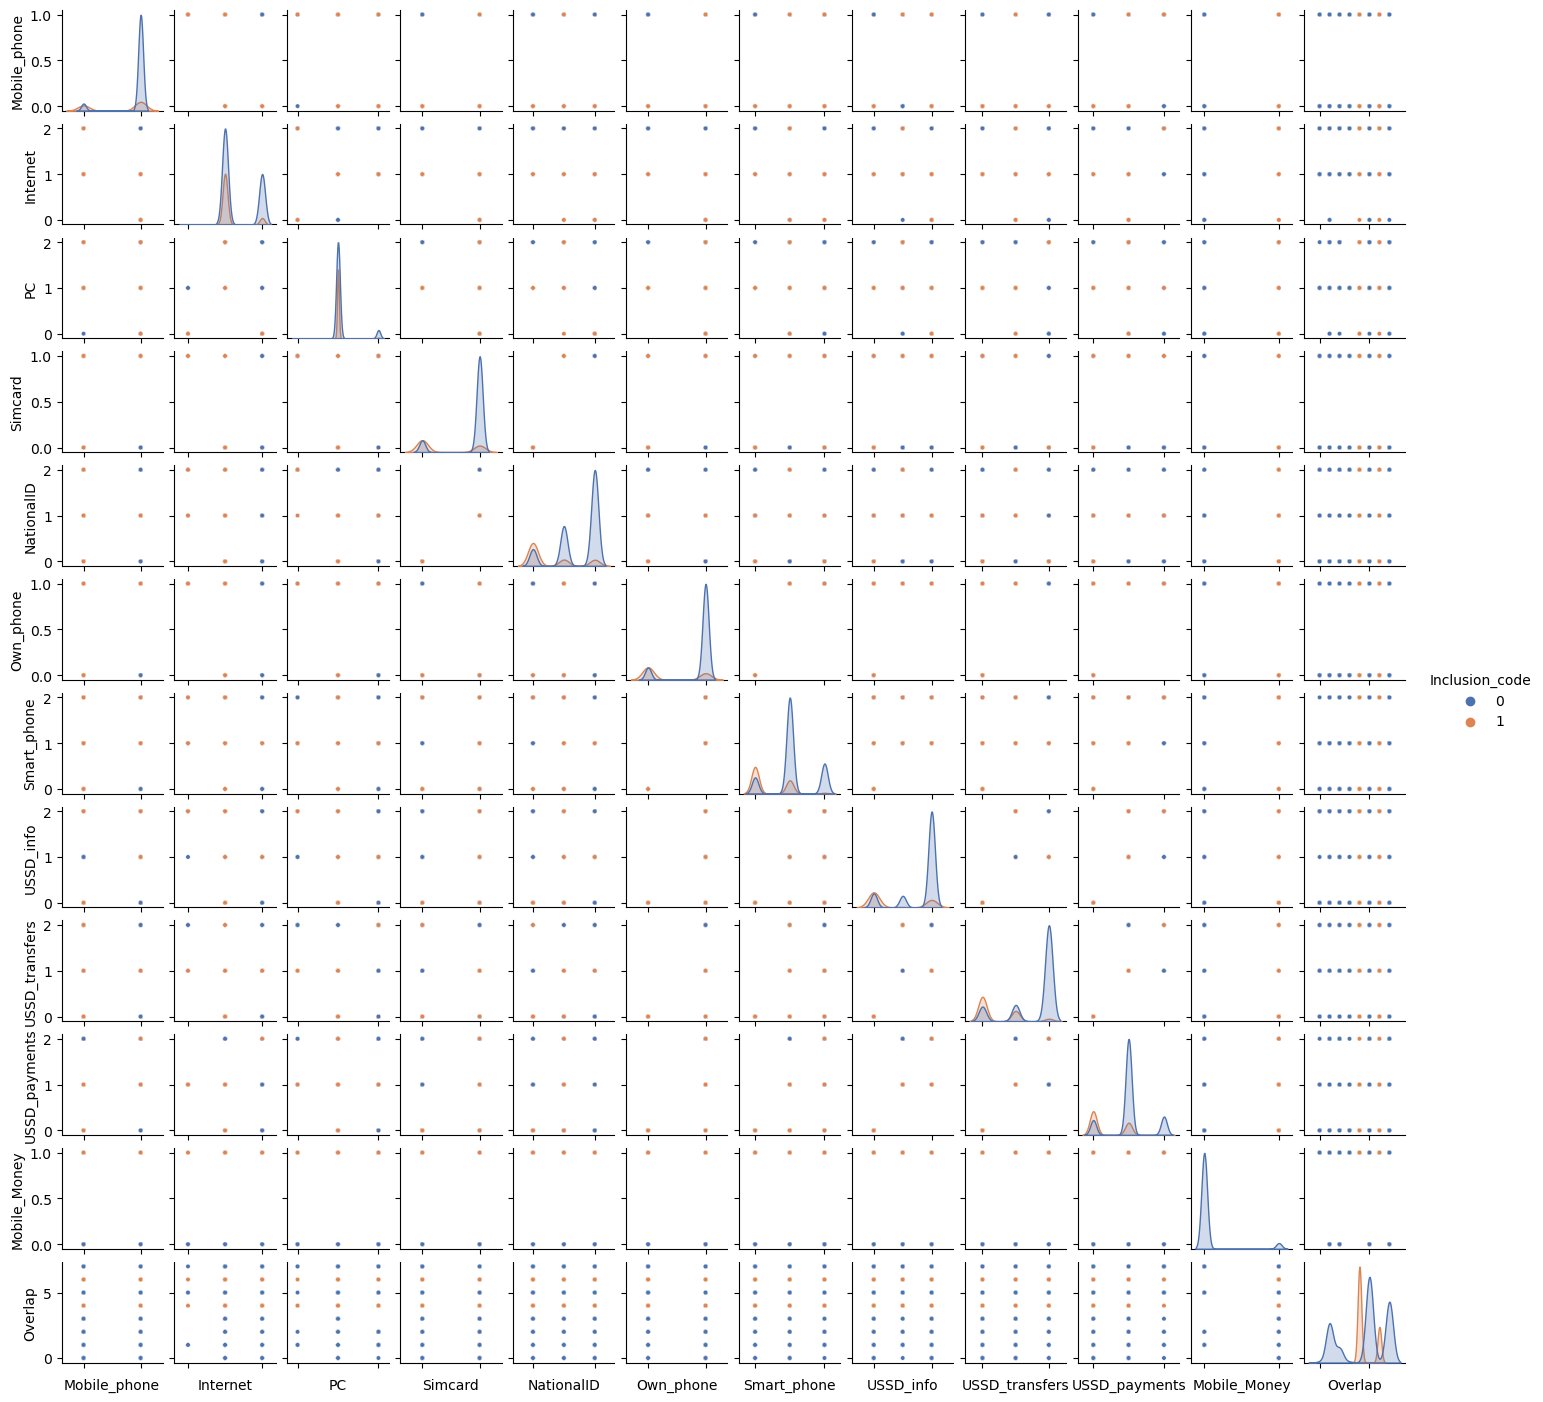

In [26]:
pp = sns.pairplot(data, hue = 'Inclusion_code', palette = 'deep', height=1.2, diag_kind = 'kde', diag_kws=dict(fill=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

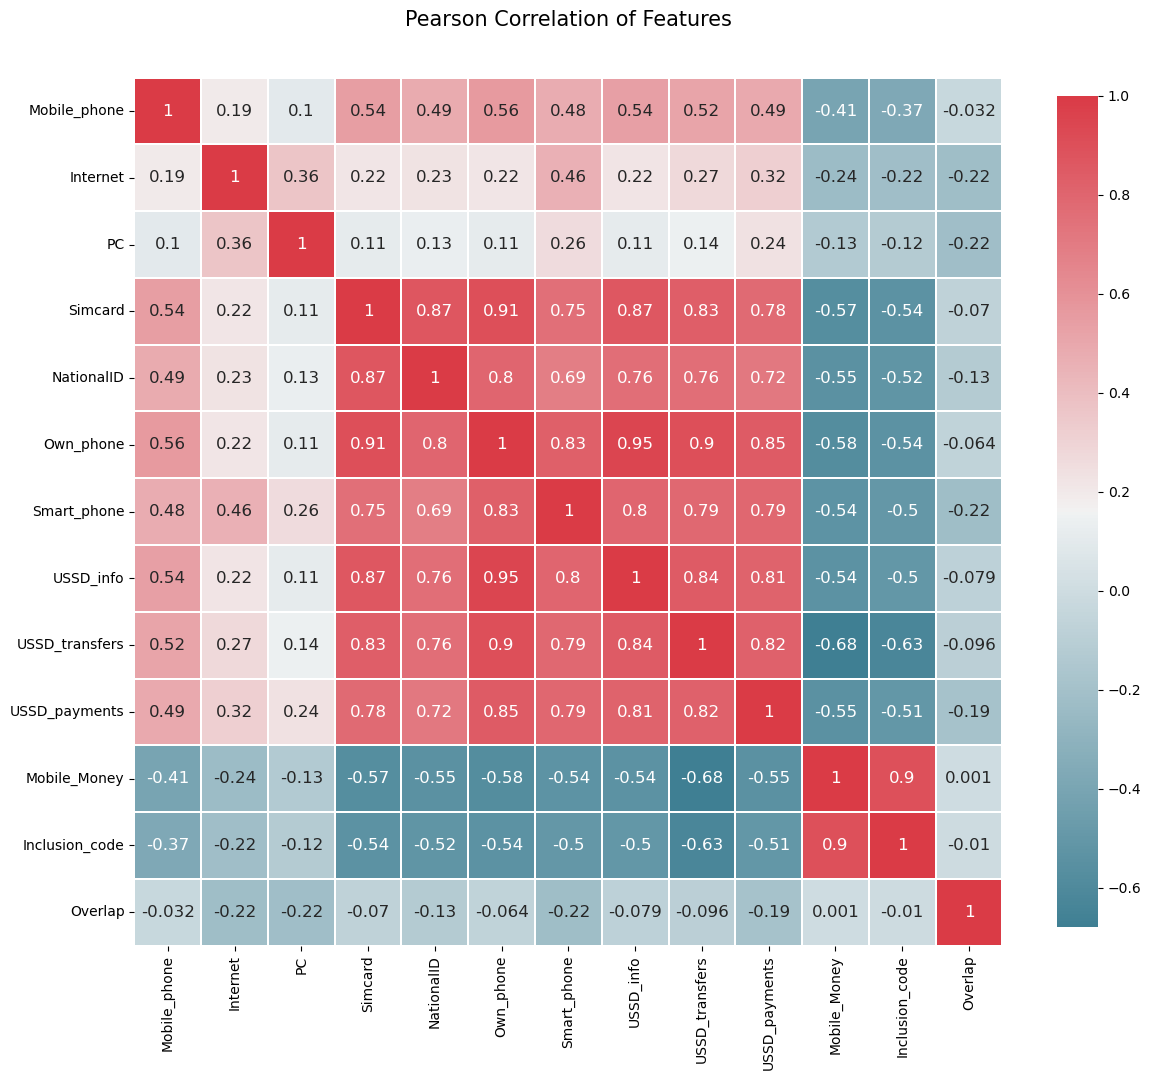

In [27]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(numeric_only=True), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

## Lets split our dataset into Training and Testing Data

We will use *sklearn* function to split the training data in two datasets; 75/25 split. This is important, so we don't overfit our model. Meaning, the algorithm is so specific to a given subset, it cannot accurately generalize another subset, from the same dataset. We will use *sklearn's* train_test_split function

In [28]:
#we will split our data using train_test_split function defaults
#random_state - we set seed so that we do not get random results everytime we run our notebook
from sklearn import model_selection

train_x, test_x, train_y, test_y = model_selection.train_test_split(data[data_dummy_x], data[target], random_state = 0)
train_dummy_x, test_dummy_x, train_dummy_y, test_dummy_y = model_selection.train_test_split(data_dummy[data_dummy_x], data[target], random_state = 0)

print("Dataset Shape: {}".format(data.shape))
print("Trainset Shape: {}".format(train_x.shape))
print("Testset Shape: {}".format(test_x.shape))

test_dummy_y.head()

Dataset Shape: (9915, 13)
Trainset Shape: (7436, 10)
Testset Shape: (2479, 10)


,Inclusion_code
8079,1
1768,0
3524,0
4233,0
665,0


# Model, predict and solve

Now we are ready to train a model and predict the required solution. Our problem is a classification and regression problem. We want to identify relationship between output (Inclusion or not and/or rate/percentage) with our selected variables or features for determining level of access to digital infrastructure. We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree

In [33]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_val = logreg.predict(train_x)
Y_pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)
acc_log

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


83.51

Logistic Regression Model Accuracy: 84.55
Training Precision: 0.67
Testing Precision: 0.69
Training Recall: 0.65
Testing Recall: 0.67


Text(0, 0.5, 'Accuracy')

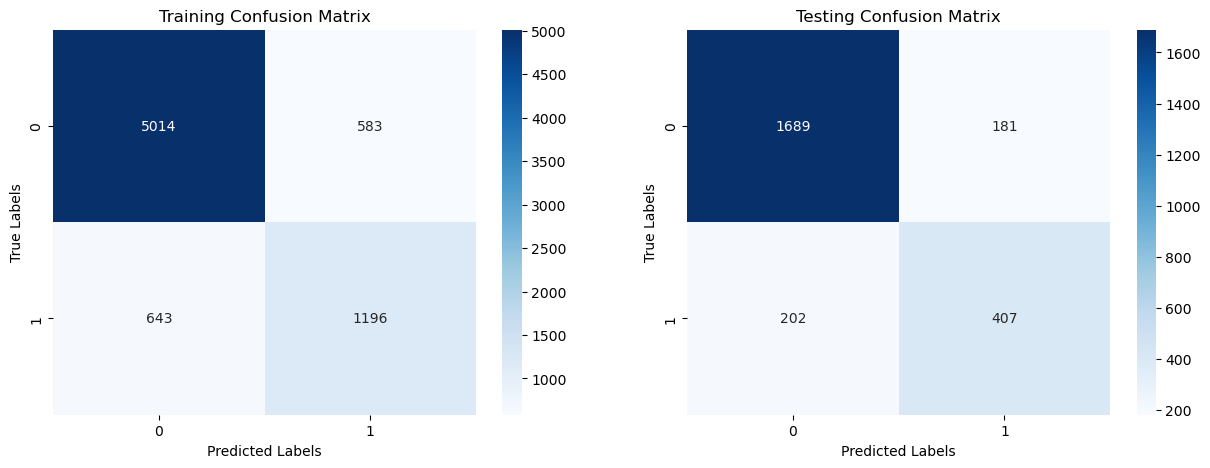

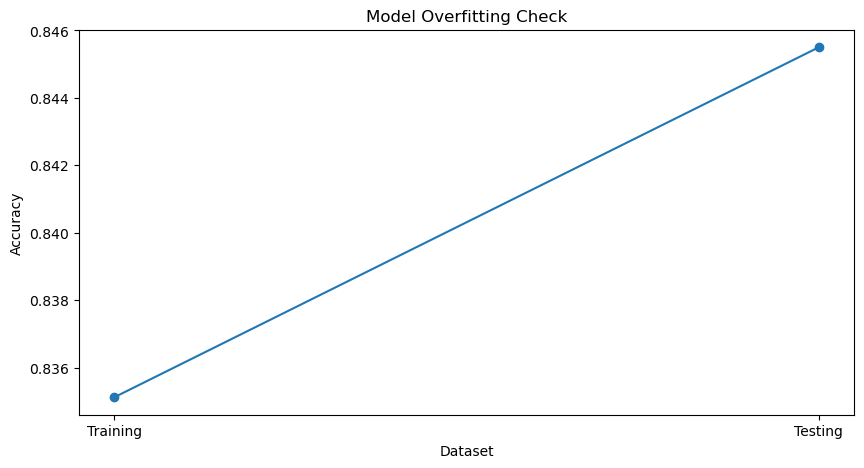

In [34]:
# full picture of our Logistic Regression Model performance using accuracy, precision, recall and confusion matrix scores.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

train_accuracy = accuracy_score(train_y, pred_val)
test_accuracy = accuracy_score(test_y, Y_pred)

train_precision = precision_score(train_y, pred_val)
test_precision = precision_score(test_y, Y_pred)

train_recall = recall_score(train_y, pred_val)
test_recall = recall_score(test_y, Y_pred)

train_CM = confusion_matrix(train_y, pred_val)
test_CM = confusion_matrix(test_y, Y_pred)

# plots and output metrics 
print(f"Logistic Regression Model Accuracy: {round(test_accuracy * 100, 2)}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(train_CM, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
sns.heatmap(test_CM, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Testing Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.figure(figsize=(10, 5 ))
plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o')
plt.title('Model Overfitting Check')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

In [36]:
train_y.shape, train_dummy_y.shape

((7436, 1), (7436, 1))

In [38]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_dummy_x, train_dummy_y)
pred_val = gaussian.predict(train_dummy_x)
Y_pred = gaussian.predict(test_dummy_x)
acc_gaussian = round(gaussian.score(train_dummy_x, train_dummy_y) * 100, 2)
acc_gaussian

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82.76

Naive Bayes Model Accuracy: 83.74
Training Precision: 0.65
Testing Precision: 0.67
Training Recall: 0.67
Testing Recall: 0.68


Text(0, 0.5, 'Accuracy')

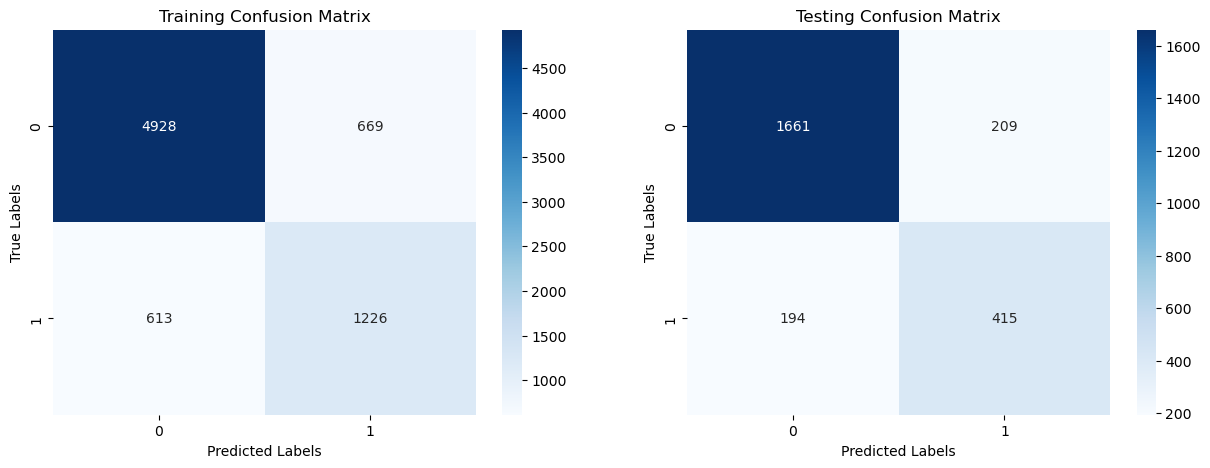

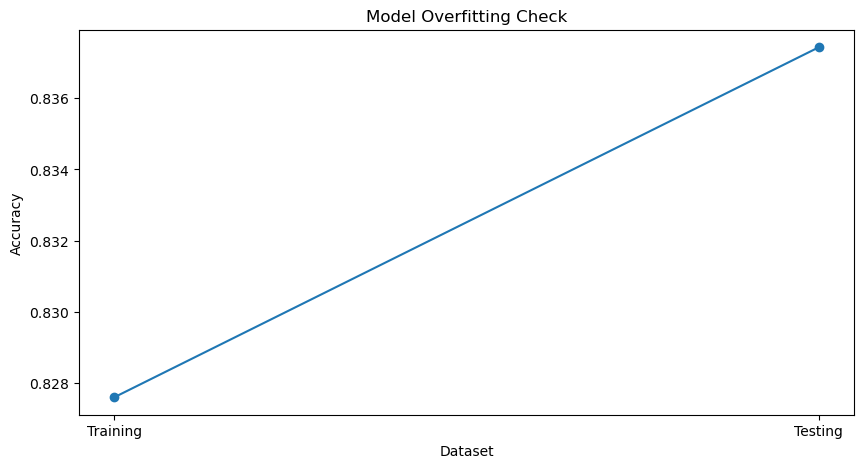

In [39]:
train_accuracy = accuracy_score(train_dummy_y, pred_val)
test_accuracy = accuracy_score(test_dummy_y, Y_pred)

train_precision = precision_score(train_dummy_y, pred_val)
test_precision = precision_score(test_dummy_y, Y_pred)

train_recall = recall_score(train_dummy_y, pred_val)
test_recall = recall_score(test_dummy_y, Y_pred)

train_CM = confusion_matrix(train_dummy_y, pred_val)
test_CM = confusion_matrix(test_dummy_y, Y_pred)

# plots and output metrics 
print(f"Naive Bayes Model Accuracy: {round(test_accuracy * 100, 2)}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(train_CM, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
sns.heatmap(test_CM, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Testing Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.figure(figsize=(10, 5 ))
plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o')
plt.title('Model Overfitting Check')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

In [36]:
# Support Vector Machines

svc = SVC()
svc.fit(train_dummy_x, train_dummy_y)
pred_val = svc.predict(train_dummy_x)
Y_pred = svc.predict(test_dummy_x)
acc_svc = round(svc.score(train_dummy_x, train_dummy_y) * 100, 2)
acc_svc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


83.69

SVM Model Accuracy: 84.79
Training Precision: 0.68
Testing Precision: 0.70
Training Recall: 0.64
Testing Recall: 0.66


Text(0, 0.5, 'Accuracy')

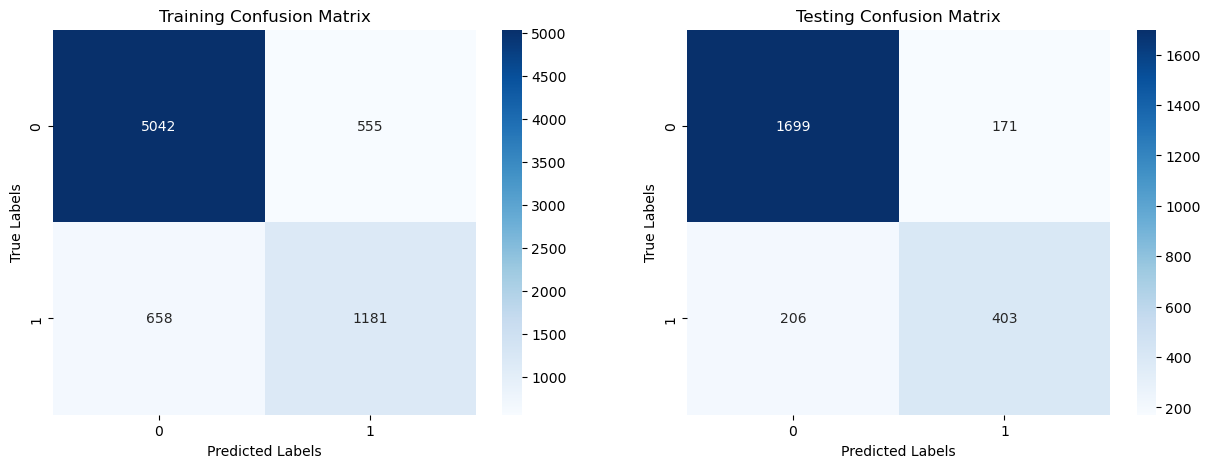

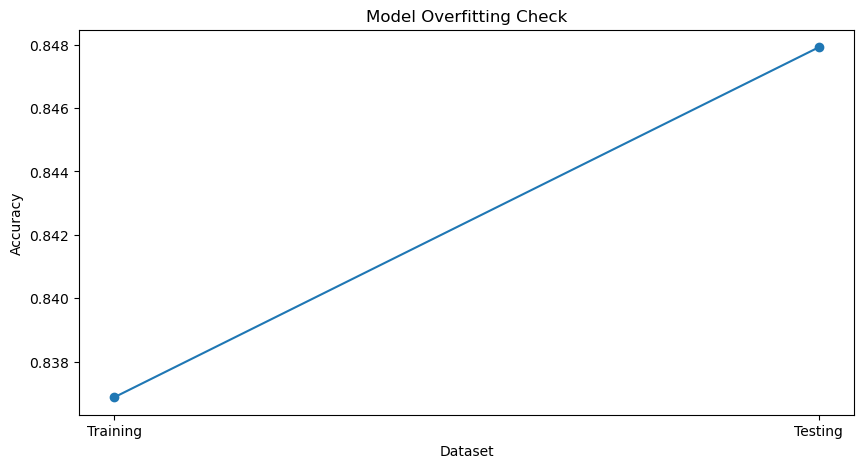

In [37]:
train_accuracy = accuracy_score(train_dummy_y, pred_val)
test_accuracy = accuracy_score(test_dummy_y, Y_pred)

train_precision = precision_score(train_dummy_y, pred_val)
test_precision = precision_score(test_dummy_y, Y_pred)

train_recall = recall_score(train_dummy_y, pred_val)
test_recall = recall_score(test_dummy_y, Y_pred)

train_CM = confusion_matrix(train_dummy_y, pred_val)
test_CM = confusion_matrix(test_dummy_y, Y_pred)

# plots and output metrics 
print(f"SVM Model Accuracy: {round(test_accuracy * 100, 2)}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(train_CM, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
sns.heatmap(test_CM, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Testing Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.figure(figsize=(10, 5 ))
plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o')
plt.title('Model Overfitting Check')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

In [ ]:
# Create Decision Tree classifier object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)

# Print the accuracy score
print(f"Decision Tree Accuracy: {acc_decision_tree}%")

## The second iteration to improve feature selection and hopefully model performance and interpretability  

- In the 1st iteration we picked our features based on mainly domain knowledge and highly correlated features. This may have affected our model performance as a result of multicollinearity, noise and overfitting.

- In this iteration we are going to the following specific inclusion/exclusion criteria

    a) **standardization** - to ensure all features contribute equally to the result but also we can apply PCA method
    
    b) **missing values** - dropping features with high proportion of empty values (> 4,000 or 40%)
    
    c) **univariate feature selection** - pick features with strongest rship with target variable
    
    d) **correlation matrix** - to avoid multicollinearity
    
    e) **randomforest feature scores** - to identify and select important features using

- we will then apply domain knowledge and PCA to select our features and components for training our model, evaluate and compare with results we got in the 1st iteration

In [26]:
main_df.describe(include=['O'])

,reg_name,dist_name,ward_name,clustertype,c1,c2,c7,c9,c10,c11,c8n_a1,c8n_a2,c8n_b1,c8n_b2,c8n_c1,c8n_c2,c8n_d1,c8n_d2,c8n_e1,c8n_e2,c8n_f1,c8n_f2,c12_1,c12_2,c12_3,c12_4,c22,c14,c15,C16,c16_unit,c17_1__1,c17_1__2,c17_1__3,c17_1__4,c17_1__5,c17_1__6,c17_1__7,c17_1__8,c17_1__9,c17_1__10,c17_1__11,c18_1__1,c18_1__2,c18_1__3,c18_1__4,c18_1__5,c18_1__6,c18_1__7,c18_1__8,c18_1__9,c18_1__10,c18_1__11,c18_1__12,c18_2,c19,c20_1,c20_2,c23__1,c23__2,c23__3,c24_2,c24_2a,C24_3,c24_1,c25__1,c25__2,c25X1__1,c25X1__3,c25X1__4,c25X1__5,c25X1__6,c25X2__1,c25X2__2,c25X2__3,c25X2__4,c25X2__5,c25X2__6,c26,c27__1,c27__2,c27__3,c27__4,c27__5,c27__6,c27__7,c27__8,c27__9,c27__10,c27__11,c27__12,c27__13,c27__14,c27__15,c27__16,c27__18,c27__19,c27__20,c27__17,D_1,D2_1__1,D2_1__2,D2_1__3,D2_1__4,D2_1__5,D2_1__6,D2_1__7,D2_1__8,D2_1__9,D2_1__10,D2_1__11,D2_1__12,D2_4,D3_1,D3_2,D4,D5,D5a,D5b,D6_1_1,D6_1_2,D6_1_3,D6_2,D6_3,D6_3a__1,D6_3a__2,D6_3a__3,D6_3a__4,D6_3a__5,D6_3a__6,D6_3a__7,D6_3a__8,D6_4,D6_4a,D6_4b,D6_4c__1,D6_4c__2,D6_4c__3,D6_4c__4,D6_4c__5,D6_4c__6,D6_4c__7,D6_4c__8,D6_4c__9,D6_4c__10,D7,D7a,D7b,D7c,D7d,e_1_1,e_1_1new,e_2,e_3_3__1,e_3_3__2,e_3_3__3,e_3_3__4,e_3_3__5,e_3_3__6,e_3_3__7,e_3_3__8,e_3_3__9,e_3_3__11,e_3_3__12,e_3_3__13,e_3_3__14,e_3_3__15,e_3_3__16,e_4,e_4n,e_5_n_1,e_5_n_2,e_6,e_7,e_7_n_1__1,e_7_n_1__2,e_7_n_1__3,e_7_n_1__4,e_7_n_1__5,e_7_n_1__6,e_7_n_1__7,e_7_n_1__8,e_7_n_1__9,e_7_n_1__10,e_7_n_2,e_7_n_3,e_7_n_4,e_10,e_11_1,e_11_2,e_11_2_n_1,e_11_2_n_2,e_11_2_n_3,e_12_1,e_12_2,e_12_4,e_13,E14_1__1,E14_1__2,E14_1__3,E14_1__4,E14_1__5,E14_1__6,f_2,f_3_1_1,f_3_1_2,f_3_2_1__1,f_3_2_1__2,f_3_2_1__3,f_3_2_1__4,f_3_2_1__5,f_3_2_1__6,f_3_2_1__7,f_3_2_1__8,f_3_2_1__9,f_3_2_2,F4_1__1,F4_1__2,F4_1__3,F4_1__4,F4_1__5,F4_1__6,F4_1__7,F4_1__8,F4_1__9,F4_1__10,F4_1__11,F4_1__12,F4_1__13,F4_1__14,F4_4,F4_5,f_5,f_5_n_1__1,f_5_n_1__2,f_5_n_1__3,f_5_n_1__4,f_5_n_1__5,f_5_n_2__1,f_5_n_2__2,f_5_n_2__3,f_5_n_2__4,f_5_n_2__5,f_7_1,f_7_2,f_8_1,f_8_2,f_9,g_1_1_1,g_1_1_4,g_1_1_7,g_1_1_8,g_1_2_1__1,g_1_2_1__2,g_1_2_1__3,g_1_2_1__4,g_1_2_1__5,g_1_2_1__6,g_1_2_1__7,g_1_2_1__8,g_1_2_1__9,g_1_2_1__10,g_1_2_2,g_2_1_1,g_2_1_2,g_2_2,g_2_3,g_2_4,g_2_5,g_2_6,g_2_6n,g_4,g_5_1__1,g_5_1__2,g_5_1__3,g_5_1__5,g_5_1__6,g_5_1__7,g_5_1__8,g_5_1__9,g_5_1__10,g_5_1__11,g_5_1__12,g_5_1__13,g_5_1__14,g_5_2__1,g_5_2__2,g_5_2__3,g_5_2__5,g_5_2__6,g_5_2__7,g_5_2__8,g_5_2__9,g_5_2__10,g_5_2__11,g_5_2__12,g_5_2__13,g_5_2__14,g_5_3,g_6,g_7,g_8_1,g_8_2,g_9,g_12_1,g_12_2,g_13_1,pay_1,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay2_1__1,pay2_1__2,pay2_1__3,pay2_1__4,pay2_1__5,pay2_1__6,pay2_1__7,pay3_1,pay4_1,pay5_1__1,pay5_1__2,pay5_1__3,pay5_1__4,pay5_1__5,pay5_1__6,pay5_1__7,pay6_1,pb1,pb2,pb3,pb4,pb5,pb2_1,pb2_2,pb2_3,pb2_4,pb2_5,pb2_6,pb3_1,pb3_2,pb3_3,pb3_4,pb4_1,pb4_2,pb4_3,pb4_4,pb4_5,pb4_6,pb4_7,gov_1__1,gov_1__2,gov_1__3,gov_1__4,gov_2__1,gov_2__2,gov_2__3,gov_2__4,gov_2__5,gov_2__6,gov_2__7,gov_3,bill_1,bill2_1,bill2_2,bill2_3,bill2_4,bill2_5,serv1_1__1,serv1_1__2,serv1_1__3,serv1_1__4,serv1_1__5,serv1_1__6,serv1_1__7,serv1_1__8,serv1_1__9,serv1_1__10,serv1_1__11,serv1_1__12,serv1_2,serv1_3,serv1_5,serv1_6,serv1_7__1,serv1_7__2,serv1_7__3,serv1_7__4,serv1_8,serv3_1,serv5_0,serv5_1,serv2_1__1,serv2_1__2,serv2_1__3,serv2_1__4,serv2_1__5,serv2_2,serv2_3,serv2_4,comm3_1,comm4_1,comm6_2,comm6_3,comm6_3a,comm7_1__1,comm7_1__2,comm7_1__3,comm7_1__4,comm7_1__5,comm7_2,comm8_1__1,comm8_1__2,comm8_1__3,comm8_1__4,comm8_1__5,comm8_1__6,comm8_1__7,comm8_1a__1,comm8_1a__3,comm8_1a__4,comm8_1a__5,comm8_1a__6,comm9_1,comm10_1,micro5_1,micro1_1,micro2_1__1,micro2_1__2,micro2_1__3,micro2_1__4,micro2_2,micro2_3,micro2_4,micro2_5,micro4_0,micro6_2,micro6_3,micro7_1__1,micro7_1__2,micro7_1__3,micro7_1__4,micro7_1__5,micro7_2,micro8_0__1,micro8_0__2,micro8_0__3,micro8_0__4,micro8_0__5,micro8_0__6,micro9_0,micro9_0a__1,micro9_0a__2,micro9_0a__3,micro9_0a__4,micro9_0a__6,micro10_0,cred1_1,cred1_2,cred2_1,cred3_1__1,cred3_1__2,cred3_1__3,cred3_1__4,cred3_1__5,cred3_1__6,cred3_1__7,cred3_1__8,cred3_1a_

In [21]:
import io
buffer = io.StringIO()
main_df.info(buf=buffer, verbose=True, show_counts=True)
s = buffer.getvalue()
with open("df_info.txt", "w", encoding="utf-8") as f:  # doctest: +SKIP
     f.write(s)

In [53]:
# preparing dataset for encoding - droppng all features with too many variability and blank responses == 415 columns (123 + 292)

obj_df = main_df.describe(include=['O'])
cols_wit_variability = obj_df.columns[(obj_df.loc['unique']) > 5]
cols_wit_blanks_over3500 = obj_df.columns[(obj_df.loc['top'].isna()) & (obj_df.loc['freq'] > 3500)]
combined_cols = cols_wit_variability.union(cols_wit_blanks_over3500)
filtered_df = main_df.drop([combined_cols])
filtered_df

KeyError: "[('reg_name', 'dist_name', 'ward_name', 'c7', 'c11', 'c12_1', 'c12_3', 'c12_4', 'C16', 'c18_2', 'c26', 'D_1', 'D2_4', 'D3_1', 'D4', 'D5', 'D5b', 'D6_1_1', 'D6_1_2', 'D6_1_3', 'D6_3', 'D6_4', 'e_5_n_1', 'e_6', 'e_7', 'e_7_n_2', 'e_10', 'e_11_1', 'e_11_2', 'f_3_2_2', 'F4_4', 'F4_5', 'f_5', 'f_7_2', 'f_8_2', 'g_1_2_2', 'g_2_2', 'g_2_3', 'g_2_6', 'g_4', 'g_5_3', 'g_6', 'g_8_1', 'g_8_2', 'g_12_2', 'pay_1_6', 'pay3_1', 'pay6_1', 'pb1', 'pb2', 'pb3', 'pb4', 'pb5', 'gov_3', 'bill2_1', 'bill2_2', 'bill2_3', 'bill2_4', 'bill2_5', 'serv1_2', 'serv1_5', 'serv3_1', 'serv5_0', 'serv5_1', 'serv2_2', 'comm4_1', 'comm6_2', 'comm6_3', 'comm7_2', 'comm9_1', 'comm10_1', 'micro5_1', 'micro1_1', 'micro4_0', 'micro6_2', 'micro6_3', 'micro9_0', 'micro10_0', 'cred1_1', 'cred1_2', 'cred2_1', 'cred4_2', 'cred4_3', 'cred5_1', 'cred5_2', 'cred6_1', 'cred6_2', 'cred9_0', 'pens3', 'pens4', 'ins1_2', 'ins4_1', 'ins4_2', 'ins5', 'ins6_1', 'ins6_2', 'mob3', 'mob4', 'mob5', 'mob7', 'mob9_2', 'mob9_3', 'mob11_3', 'mob12', 'mob13', 'mob14', 'mob15', 'mob17', 'mob17c', 'mob17d', 'cmg2', 'cmg3', 'cmg4_3', 'cmg4_4', 'cmg4_8', 'cmg4_10', 'cmg4_12', 'lender1', 'lender3', 'lender4', 'lender5', 'overlapx', 'IncomeMain')] not found in axis"

In [27]:
main_df.drop(columns = ['c8n_a2', 'c8n_b2', 'c8n_c2', 'c8n_d2', 'c8n_e2', 'c8n_f2', 'c12_2', 'c25X2__1', 'c25X2__2', 'c25X2__3', 'c25X2__4', 'c25X2__5', 'c25X2__6', 'D3_2', 'D5a', 'D6_2', 'D6_3a__1', 'D6_3a__3', 'D6_3a__4', 'D6_3a__5', 'D6_3a__8', 'D6_4a', 'D6_4b', 'D6_4c__1', 'D6_4c__2', 'D6_4c__3', 'D6_4c__4', 'D6_4c__5', 'D6_4c__6', 'D6_4c__7', 'D6_4c__8', 'D6_4c__9', 'D6_4c__10', 'D7', 'D7c', 'D7d', 'e_11_2_n_2', 'e_11_2_n_3', 'F4_1__1', 'F4_1__2', 'F4_1__3', 'F4_1__4', 'F4_1__5', 'F4_1__6', 'F4_1__7', 'F4_1__8', 'F4_1__9', 'F4_1__10', 'F4_1__11', 'F4_1__12', 'F4_1__13', 'F4_1__14', 'f_5_n_2__1', 'f_5_n_2__2', 'f_5_n_2__3', 'f_5_n_2__4', 'f_5_n_2__5', 'f_9', 'g_2_1_2', 'g_2_5', 'g_2_6n', 'g_5_1__1', 'g_5_1__2', 'g_5_1__3', 'g_5_1__5', 'g_5_1__6', 'g_5_1__7', 'g_5_1__8', 'g_5_1__9', 'g_5_1__10', 'g_5_1__11', 'g_5_1__12', 'g_5_1__13', 'g_5_1__14', 'g_5_2__1', 'g_5_2__2', 'g_5_2__3', 'g_5_2__5', 'g_5_2__6', 'g_5_2__7', 'g_5_2__8', 'g_5_2__9', 'g_5_2__10', 'g_5_2__11', 'g_5_2__12', 'g_5_2__13', 'g_5_2__14', 'g_7', 'g_9', 'g_12_1', 'pay2_1__1', 'pay2_1__2', 'pay2_1__3', 'pay2_1__4', 'pay2_1__5', 'pay2_1__6', 'pay2_1__7', 'pay5_1__1', 'pay5_1__2', 'pay5_1__3', 'pay5_1__4', 'pay5_1__5', 'pay5_1__6', 'pay5_1__7', 'gov_1__1', 'gov_1__2', 'gov_1__3', 'gov_1__4', 'gov_2__1', 'gov_2__2', 'gov_2__3', 'gov_2__4', 'gov_2__5', 'gov_2__6', 'gov_2__7', 'serv1_7__1', 'serv1_7__2', 'serv1_7__3', 'serv1_7__4', 'serv1_8', 'serv2_1__1', 'serv2_1__2', 'serv2_1__3', 'serv2_1__4', 'serv2_1__5', 'serv2_3', 'serv2_4', 'comm3_1', 'comm6_3a', 'comm7_1__1', 'comm7_1__2', 'comm7_1__3', 'comm7_1__4', 'comm7_1__5', 'comm8_1__1', 'comm8_1__2', 'comm8_1__3', 'comm8_1__4', 'comm8_1__5', 'comm8_1__6', 'comm8_1__7', 'comm8_1a__1', 'comm8_1a__3', 'comm8_1a__4', 'comm8_1a__5', 'comm8_1a__6', 'micro2_1__1', 'micro2_1__2', 'micro2_1__3', 'micro2_1__4', 'micro2_2', 'micro2_3', 'micro2_4', 'micro2_5', 'micro7_1__1', 'micro7_1__2', 'micro7_1__3', 'micro7_1__4', 'micro7_1__5', 'micro7_2', 'micro8_0__1', 'micro8_0__2', 'micro8_0__3', 'micro8_0__4', 'micro8_0__5', 'micro8_0__6', 'micro9_0a__1', 'micro9_0a__2', 'micro9_0a__3', 'micro9_0a__4', 'micro9_0a__6', 'cred3_1__1', 'cred3_1__2', 'cred3_1__3', 'cred3_1__4', 'cred3_1__5', 'cred3_1__6', 'cred3_1__7', 'cred3_1__8', 'cred3_1a__1', 'cred3_1a__2', 'cred3_1a__3', 'cred3_1a__4', 'cred3_1a__5', 'cred3_1a__6', 'cred3_2__1', 'cred3_2__2', 'cred3_2__3', 'cred3_2__4', 'cred3_2__5', 'cred3_2__6', 'cred3_2__7', 'cred3_2__8', 'cred3_2__9', 'pens2', 'ins3_1__1', 'ins3_1__2', 'ins3_1__3', 'ins3_1__4', 'ins3_1__5', 'ins3_1__6', 'ins3_1__7', 'ins3_1__8', 'ins3_1__9', 'ins3_1__10', 'ins3_1__11', 'ins3_1__12', 'ins3_1__13', 'ins3_1__14', 'ins3_1__15', 'ins3_1__16', 'ins3_1__17', 'ins3_1__18', 'ins3_5', 'ins4_2a__1', 'ins4_2a__2', 'ins4_2a__3', 'ins4_2a__4', 'ins4_2a__5', 'ins4_2a__6', 'mob5e', 'mob8__1', 'mob10_1__1', 'mob10_2__1', 'mob10_2__2', 'mob10_2__3', 'mob10_2__4', 'mob11_2__1', 'mob11_2__2', 'mob11_2__3', 'mob16_2__2', 'mob16_2__5', 'mob16_2__6', 'mob16_2__7', 'mob17a__5', 'cmg1__1', 'cmg1__2', 'cmg1__3', 'cmg1__4', 'cmg1a', 'cmg4_1__1', 'cmg4_1__2', 'cmg4_1__3', 'cmg4_1__4', 'cmg4_1__5', 'cmg4_1__6', 'cmg4_1__7', 'cmg4_2__1', 'cmg4_2__2', 'cmg4_2__3', 'cmg4_2__4', 'cmg4_2__5', 'cmg4_2__6', 'cmg4_2__7', 'cmg4_2__8', 'cmg4_2__9', 'cmg4_2__10', 'cmg4_2a__1', 'cmg4_2a__2', 'cmg4_2a__3', 'cmg4_2a__4', 'cmg4_2a__5', 'cmg4_2a__6', 'cmg4_2a__7', 'cmg4_7', 'cmg4_9', 'cmg4_11', 'cmg4_13__1', 'cmg4_13__2', 'cmg4_13__3', 'cmg4_13__4', 'cmg4_13__5', 'cmg4_13__6', 'cmg4_13__7', 'cmg4_13__8', 'cmg4_14', 'cmg4_14a__1', 'cmg4_14a__2', 'cmg4_14a__3', 'cmg4_14a__4', 'cmg4_14a__5', 'cmg4_14a__6', 'cmg4_14a__7', 'cmg4_14a__8', 'cmg4_14a__9', 'lender4a', 'lender4b__1', 'lender4b__2', 'lender4b__3', 'lender4b__4', 'lender4b__5', 'lender4b__6'], inplace=True)
main_df

,SN,reg_name,reg_code,dist_code,dist_name,ward_code1,ward_name,ea_code,clustertype,c1,c2,c7,c8c,c9,c10,c11,c8n_a1,c8n_b1,c8n_c1,c8n_d1,c8n_e1,c8n_f1,c12_1,c12_3,c12_4,c22,c14,c15,C16,c16_unit,c17_1__1,c17_1__2,c17_1__3,c17_1__4,c17_1__5,c17_1__6,c17_1__7,c17_1__8,c17_1__9,c17_1__10,c17_1__11,c18_1__1,c18_1__2,c18_1__3,c18_1__4,c18_1__5,c18_1__6,c18_1__7,c18_1__8,c18_1__9,c18_1__10,c18_1__11,c18_1__12,c18_2,c19,c20_1,c20_2,c23__1,c23__2,c23__3,c24_2,c24_2a,C24_3,c24_1,c25__1,c25__2,c25X1__1,c25X1__3,c25X1__4,c25X1__5,c25X1__6,c26,c27__1,c27__2,c27__3,c27__4,c27__5,c27__6,c27__7,c27__8,c27__9,c27__10,c27__11,c27__12,c27__13,c27__14,c27__15,c27__16,c27__18,c27__19,c27__20,c27__17,D_1,D2_1__1,D2_1__2,D2_1__3,D2_1__4,D2_1__5,D2_1__6,D2_1__7,D2_1__8,D2_1__9,D2_1__10,D2_1__11,D2_1__12,D2_4,D3_1,D4,D5,D5b,D6_1_1,D6_1_2,D6_1_3,D6_3,D6_3a__2,D6_3a__6,D6_3a__7,D6_4,D7a,D7b,e_1_1,e_1_1new,e_2,e_3_3__1,e_3_3__2,e_3_3__3,e_3_3__4,e_3_3__5,e_3_3__6,e_3_3__7,e_3_3__8,e_3_3__9,e_3_3__11,e_3_3__12,e_3_3__13,e_3_3__14,e_3_3__15,e_3_3__16,e_4,e_4n,e_5_1,e_5_2,e_5_n_1,e_5_n_2,e_6,e_7,e_7_n_1__1,e_7_n_1__2,e_7_n_1__3,e_7_n_1__4,e_7_n_1__5,e_7_n_1__6,e_7_n_1__7,e_7_n_1__8,e_7_n_1__9,e_7_n_1__10,e_7_n_2,e_7_n_3,e_7_n_4,e_10,e_11_1,e_11_2,e_11_2_n_1,e_12_1,e_12_2,e_12_4,e_13,E14_1__1,E14_1__2,E14_1__3,E14_1__4,E14_1__5,E14_1__6,f_2,f_3_1_1,f_3_1_2,f_3_2_1__1,f_3_2_1__2,f_3_2_1__3,f_3_2_1__4,f_3_2_1__5,f_3_2_1__6,f_3_2_1__7,f_3_2_1__8,f_3_2_1__9,f_3_2_2,F4_4,F4_5,f_5,f_5_n_1__1,f_5_n_1__2,f_5_n_1__3,f_5_n_1__4,f_5_n_1__5,f_7_1,f_7_2,f_8_1,f_8_2,g_1_1_1,g_1_1_4,g_1_1_7,g_1_1_8,g_1_2_1__1,g_1_2_1__2,g_1_2_1__3,g_1_2_1__4,g_1_2_1__5,g_1_2_1__6,g_1_2_1__7,g_1_2_1__8,g_1_2_1__9,g_1_2_1__10,g_1_2_2,g_2_1_1,g_2_2,g_2_3,g_2_4,g_2_6,g_4,g_5_3,g_6,g_8_1,g_8_2,g_12_2,g_13_1,pay_1,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay3_1,pay4_1,pay6_1,pb1,pb2,pb3,pb4,pb5,pb2_1,pb2_2,pb2_3,pb2_4,pb2_5,pb2_6,pb3_1,pb3_2,pb3_3,pb3_4,pb4_1,pb4_2,pb4_3,pb4_4,pb4_5,pb4_6,pb4_7,gov_3,bill_1,bill2_1,bill2_2,bill2_3,bill2_4,bill2_5,serv1_1__1,serv1_1__2,serv1_1__3,serv1_1__4,serv1_1__5,serv1_1__6,serv1_1__7,serv1_1__8,serv1_1__9,serv1_1__10,serv1_1__11,serv1_1__12,serv1_2,serv1_3,serv1_5,serv1_6,serv3_1,serv5_0,serv5_1,serv2_2,comm4_1,comm6_2,comm6_3,comm7_2,comm9_1,comm10_1,micro5_1,micro1_1,micro4_0,micro6_2,micro6_3,micro9_0,micro10_0,cred1_1,cred1_2,cred2_1,cred4_2,cred4_3,cred5_1,cred5_2,cred6_1,cred6_2,cred9_0,pens1,pens3,pens4,ins1_1,ins1_2,ins1_3__1,ins1_3__2,ins1_3__3,ins1_3__4,ins2,ins4_1,ins4_2,ins5,ins6_1,ins6_2,ins6_2a__1,ins6_2a__2,ins6_2a__3,ins6_2a__4,mob1_3,mob1_4,mob1_6,mob1_7,mob1_8,mob1_9,mob1_10,mob2,mob3,mob4,mob5,mob5a,mob5b,mob5c,mob5d,mob5f,mob5g,mob6,mob7,mob8__2,mob8__3,mob8__4,mob8__5,mob8__6,mob9_2,mob9_3,mob10_1__2,mob10_1__3,mob10_1__4,mob10_1__5,mob10_1__6,mob10_1__7,mob11_1,mob11_3,mob12,mob13,mob14,mob15,mob16_1,mob16_2__1,mob16_2__3,mob16_2__4,mob16_2__8,mob17,mob17a__1,mob17a__2,mob17a__3,mob17a__4,mob17a__6,mob17a__7,mob17b,mob17c,mob17d,mob17e,mob17f__1,mob17f__2,mob17f__3,mob17f__4,cmg2,cmg3,cmg4_3,cmg4_4,cmg4_8,cmg4_10,cmg4_12,lender1,lender3,lender4,lender5,k_1_1,k_1_2,k_2_1,k_2_2,k_2_3,k_2_4,k_3__1,k_3__2,k_3__3,k_3__4,RU,MZ,tot,Household_weight,population_wt,MM,BANKED,MFI,PENSION,INSURANCE,SACCO,CAPITALM_FUND_MANAGERS,FORM_INVESTMENTS,CMG,INFORMAL_MONEYLENDER,SOCIAL_GROUPS,OTHER_FORMAL,OVERALL_FORMAL,INFORMAL,fasx,overlapx,IncomeMain,BusO,DEDICATED_FARMER,SMALLHOLDER_FARMER
0,4529,Mwanza,19,7,Misungwi,251,Mondo,4,Rural,Original,Respondent is hhh,,47,Female,Married/living together,Some primary,Yes,No,No,No,No,No,You personally own the land/plot where you live,,Inherited money/the land,Yes,Yes,You own the land you use for farming,2,Hectares,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Your household sells some of its crops and use...,Equally for consumption and selling,Yes,No,Yes,Yes,No,Yes,Yes,"It is bad – calls rarely connect, calls often ...",Yes,No,Yes,Yes,Yes,No,No,No,,Yes,No,No,Yes,No,No,No,No,No,No,No,No,

In [28]:
# not part of variables 
main_df.drop(columns=['SN', 'reg_code', 'dist_code', 'ward_code1', 'ea_code'], inplace=True)

In [7]:
main_df.duplicated().sum()

0

In [29]:
main_df.drop('DEDICATED_FARMER', axis=1, inplace=True) # all respondents NOT dedicated farmers

In [30]:
# dataset now consists of only categorical variables, so applying encoder 
from sklearn.preprocessing import LabelEncoder

encoders = {}
for column in main_df.columns:
    le = LabelEncoder()
    main_df[column] = le.fit_transform(main_df[column])
    encoders[column] = le

main_df.head(10)

,reg_name,dist_name,ward_name,clustertype,c1,c2,c7,c8c,c9,c10,c11,c8n_a1,c8n_b1,c8n_c1,c8n_d1,c8n_e1,c8n_f1,c12_1,c12_3,c12_4,c22,c14,c15,C16,c16_unit,c17_1__1,c17_1__2,c17_1__3,c17_1__4,c17_1__5,c17_1__6,c17_1__7,c17_1__8,c17_1__9,c17_1__10,c17_1__11,c18_1__1,c18_1__2,c18_1__3,c18_1__4,c18_1__5,c18_1__6,c18_1__7,c18_1__8,c18_1__9,c18_1__10,c18_1__11,c18_1__12,c18_2,c19,c20_1,c20_2,c23__1,c23__2,c23__3,c24_2,c24_2a,C24_3,c24_1,c25__1,c25__2,c25X1__1,c25X1__3,c25X1__4,c25X1__5,c25X1__6,c26,c27__1,c27__2,c27__3,c27__4,c27__5,c27__6,c27__7,c27__8,c27__9,c27__10,c27__11,c27__12,c27__13,c27__14,c27__15,c27__16,c27__18,c27__19,c27__20,c27__17,D_1,D2_1__1,D2_1__2,D2_1__3,D2_1__4,D2_1__5,D2_1__6,D2_1__7,D2_1__8,D2_1__9,D2_1__10,D2_1__11,D2_1__12,D2_4,D3_1,D4,D5,D5b,D6_1_1,D6_1_2,D6_1_3,D6_3,D6_3a__2,D6_3a__6,D6_3a__7,D6_4,D7a,D7b,e_1_1,e_1_1new,e_2,e_3_3__1,e_3_3__2,e_3_3__3,e_3_3__4,e_3_3__5,e_3_3__6,e_3_3__7,e_3_3__8,e_3_3__9,e_3_3__11,e_3_3__12,e_3_3__13,e_3_3__14,e_3_3__15,e_3_3__16,e_4,e_4n,e_5_1,e_5_2,e_5_n_1,e_5_n_2,e_6,e_7,e_7_n_1__1,e_7_n_1__2,e_7_n_1__3,e_7_n_1__4,e_7_n_1__5,e_7_n_1__6,e_7_n_1__7,e_7_n_1__8,e_7_n_1__9,e_7_n_1__10,e_7_n_2,e_7_n_3,e_7_n_4,e_10,e_11_1,e_11_2,e_11_2_n_1,e_12_1,e_12_2,e_12_4,e_13,E14_1__1,E14_1__2,E14_1__3,E14_1__4,E14_1__5,E14_1__6,f_2,f_3_1_1,f_3_1_2,f_3_2_1__1,f_3_2_1__2,f_3_2_1__3,f_3_2_1__4,f_3_2_1__5,f_3_2_1__6,f_3_2_1__7,f_3_2_1__8,f_3_2_1__9,f_3_2_2,F4_4,F4_5,f_5,f_5_n_1__1,f_5_n_1__2,f_5_n_1__3,f_5_n_1__4,f_5_n_1__5,f_7_1,f_7_2,f_8_1,f_8_2,g_1_1_1,g_1_1_4,g_1_1_7,g_1_1_8,g_1_2_1__1,g_1_2_1__2,g_1_2_1__3,g_1_2_1__4,g_1_2_1__5,g_1_2_1__6,g_1_2_1__7,g_1_2_1__8,g_1_2_1__9,g_1_2_1__10,g_1_2_2,g_2_1_1,g_2_2,g_2_3,g_2_4,g_2_6,g_4,g_5_3,g_6,g_8_1,g_8_2,g_12_2,g_13_1,pay_1,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay3_1,pay4_1,pay6_1,pb1,pb2,pb3,pb4,pb5,pb2_1,pb2_2,pb2_3,pb2_4,pb2_5,pb2_6,pb3_1,pb3_2,pb3_3,pb3_4,pb4_1,pb4_2,pb4_3,pb4_4,pb4_5,pb4_6,pb4_7,gov_3,bill_1,bill2_1,bill2_2,bill2_3,bill2_4,bill2_5,serv1_1__1,serv1_1__2,serv1_1__3,serv1_1__4,serv1_1__5,serv1_1__6,serv1_1__7,serv1_1__8,serv1_1__9,serv1_1__10,serv1_1__11,serv1_1__12,serv1_2,serv1_3,serv1_5,serv1_6,serv3_1,serv5_0,serv5_1,serv2_2,comm4_1,comm6_2,comm6_3,comm7_2,comm9_1,comm10_1,micro5_1,micro1_1,micro4_0,micro6_2,micro6_3,micro9_0,micro10_0,cred1_1,cred1_2,cred2_1,cred4_2,cred4_3,cred5_1,cred5_2,cred6_1,cred6_2,cred9_0,pens1,pens3,pens4,ins1_1,ins1_2,ins1_3__1,ins1_3__2,ins1_3__3,ins1_3__4,ins2,ins4_1,ins4_2,ins5,ins6_1,ins6_2,ins6_2a__1,ins6_2a__2,ins6_2a__3,ins6_2a__4,mob1_3,mob1_4,mob1_6,mob1_7,mob1_8,mob1_9,mob1_10,mob2,mob3,mob4,mob5,mob5a,mob5b,mob5c,mob5d,mob5f,mob5g,mob6,mob7,mob8__2,mob8__3,mob8__4,mob8__5,mob8__6,mob9_2,mob9_3,mob10_1__2,mob10_1__3,mob10_1__4,mob10_1__5,mob10_1__6,mob10_1__7,mob11_1,mob11_3,mob12,mob13,mob14,mob15,mob16_1,mob16_2__1,mob16_2__3,mob16_2__4,mob16_2__8,mob17,mob17a__1,mob17a__2,mob17a__3,mob17a__4,mob17a__6,mob17a__7,mob17b,mob17c,mob17d,mob17e,mob17f__1,mob17f__2,mob17f__3,mob17f__4,cmg2,cmg3,cmg4_3,cmg4_4,cmg4_8,cmg4_10,cmg4_12,lender1,lender3,lender4,lender5,k_1_1,k_1_2,k_2_1,k_2_2,k_2_3,k_2_4,k_3__1,k_3__2,k_3__3,k_3__4,RU,MZ,tot,Household_weight,population_wt,MM,BANKED,MFI,PENSION,INSURANCE,SACCO,CAPITALM_FUND_MANAGERS,FORM_INVESTMENTS,CMG,INFORMAL_MONEYLENDER,SOCIAL_GROUPS,OTHER_FORMAL,OVERALL_FORMAL,INFORMAL,fasx,overlapx,IncomeMain,BusO,SMALLHOLDER_FARMER
0,20,84,411,0,0,0,0,31,0,1,7,1,0,0,0,0,0,5,0,2,1,1,1,44,2,1,1,2,2,2,1,1,1,1,1,1,1,1,1,2,2,2,1,2,1,2,1,1,11,3,2,1,1,2,1,1,2,0,1,1,2,2,2,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,1,0,0,0,0,0,0,0,0,4,0,1,0,1,1,0,0,3,1,1,1,7,1,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,1,7,3,0,0,0,1,1,1,1,1,1,0,7,0,2,3,5,3,0,0,1,0,3,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2,2,1,1,1,1,1,2,2,2,1,1,10,1,4,129,1,0,0,11,5,20,6,0,0,2,1,1,0,0,0,0,1,4,6,12,5,12,4,3,3,3,3,3,3,3,3,3,3,2,2,2,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,11,3,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,2,1,0,2,3,4,0,0,0,

In [31]:
target = 'fasx'
features = main_df.drop(columns=[target]).columns

In [32]:
# feature standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
main_df[features] = scaler.fit_transform(main_df[features])

In [33]:
# Univariate feature selection using F-test to obtain most significant features related to target variable and improve model performance
# from 300 features we want to keep only 25 most significant features i.e. k = 25 i.e. a feature importance >=0.01
from sklearn.feature_selection import SelectKBest, f_classif

df_new = SelectKBest(f_classif, k=25).fit_transform(main_df[features], main_df[target])
selected_features = [features[i] for i in SelectKBest(f_classif, k=25).fit(main_df[features], main_df[target]).get_support(indices=True)]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [401] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [401] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [34]:
# applying labels from the dataset dictionary to give our new dataframe columns names we can understand

df_new = pd.DataFrame(df_new, columns=selected_features)
df_new = df_new.rename(columns=label_dict)
df_new

,J1.1.Use sometimes_Banks,J1.1.Use sometimes_Mobile money agents,J1.2.Which of these would feel most important to use for managing money?,J1.6.Do you know where to report your issues or complaints with(%serv1_5%)?,J3.1.Why don't you use another institution or organizations?,5.0.When did you start using a bank?,1.What is the main reason why you started using banks?,4.Which of the following things (if any) do YOU value most from using a bank?,7.2. Which do you use most often?,2.Are you currently using mobile money?,"5.a.7. You borrowed digital loan money to improve your life, but the debt made you worse off",6.Which of the following statements applies to you?,8.Which mobile money services do you use?_T-pesa,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Lost money,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Agent wanted you to reveal your PIN number,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Any other problem,11.1.Have you ever borrowed money through mobile money services?,16.1.Have you ever used a mobile money agent?,"17a.In the past 12 months, which of the following actions have you done using your mobile money account?_Fundraise","17a.In the past 12 months, which of the following actions have you done using your mobile money account?_Betting/Lottery",Mobile money,Banked,OTHER_FORMAL (NON BANK),OVERALL_FORMAL,Overlaps in Financial Access
0,-0.412371,0.759317,1.436216,-0.030355,-0.557076,-0.3648,-0.390356,-0.400686,-0.35239,0.796568,0.840517,0.919980,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525,-0.638108,0.508182,0.582669,0.572575,0.214514
1,-0.412371,-1.316973,1.436216,1.244939,-0.557076,-0.3648,-0.390356,-0.400686,-0.35239,-1.255386,-1.222031,-1.209246,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,1.567134,0.508182,0.582669,0.572575,0.214514
2,-0.412371,-1.316973,1.436216,1.244939,-0.557076,-0.3648,-0.390356,-0.400686,-0.35239,0.796568,0.840517,0.919980,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525,-0.638108,0.508182,0.582669,0.572575,0.214514
3,-0.412371,-1.316973,1.436216,1.244939,-0.557076,-0.3648,-0.390356,-0.400686,-0.35239,0.796568,0.840517,0.210238,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525,-0.638108,0.508182,0.582669,0.572575,0.214514
4,-0.412371,0.759317,0.689868,1.244939,-0.557076,-0.3648,-0.390356,-0.400686,-0.35239,0.796568,0.840517,0.919980,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,2.660784,-0.638108,0.508182,0.582669,0.572575,0.214514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,-0.412371,-1.316973,-1.300396,-1.305649,1.267035,-0.3648,-0.390356,-0.400686,-0.35239,-1.255386,-1.222031,-1.209246,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,1.567134,0.508182,-1.716241,-1.746495,-0.292859
9911,-0.412371,-1.316973,-1.300396,-1.305649,1.267035,-0.3648,-0.390356,-0.400686,-0.35239,-1.255386,-1.222031,-1.209246,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,1.567134,0.508182,-1.716241,-1.746495,-0.292859
9912,-0.412371,0.759317,0.689868,-0.030355,-0.557076,-0.3648,-0.390356,-0.400686,-0.35239,-1.255386,-1.222031,-1.209246,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,-0.638108,0.508182,0.582669,0.572575,0.214514
9913,-0.412371,-1.316973,-1.300396,-1.305649,1.631857,-0.3648,-0.390356,-0.400686,-0.35239,-1.255386,-1.222031,-1.209246,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,1.567134,0.508182,-1.716241,-1.746495,0.721888


In [12]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_df[features], main_df[target], test_size=0.2, random_state=42)

In [13]:
# Feature importance from RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature overlapx (0.10468418949135092)
2. feature BANKED (0.07145561114395556)
3. feature OVERALL_FORMAL (0.05010237045390729)
4. feature MM (0.04156975987487962)
5. feature INFORMAL (0.0331184460871733)
6. feature comm6_2 (0.03163299219267178)
7. feature serv1_2 (0.02752516520480073)
8. feature OTHER_FORMAL (0.02730013765798998)
9. feature comm10_1 (0.026011252415790106)
10. feature serv1_1__1 (0.0245021194905724)
11. feature serv3_1 (0.023090603451126714)
12. feature comm7_2 (0.022038368374359064)
13. feature comm4_1 (0.021758904168052907)
14. feature serv5_0 (0.020961892286954897)
15. feature serv1_6 (0.019256823466904497)
16. feature comm9_1 (0.01809539036323932)
17. feature serv5_1 (0.017213445824665316)
18. feature g_4 (0.015427024531048971)
19. feature serv1_3 (0.014765970536883846)
20. feature serv1_1__5 (0.013156408633381984)
21. feature mob11_3 (0.012365561286576848)
22. feature mob13 (0.011570250538782736)
23. feature mob12 (0.011392294898678847)
24. feat

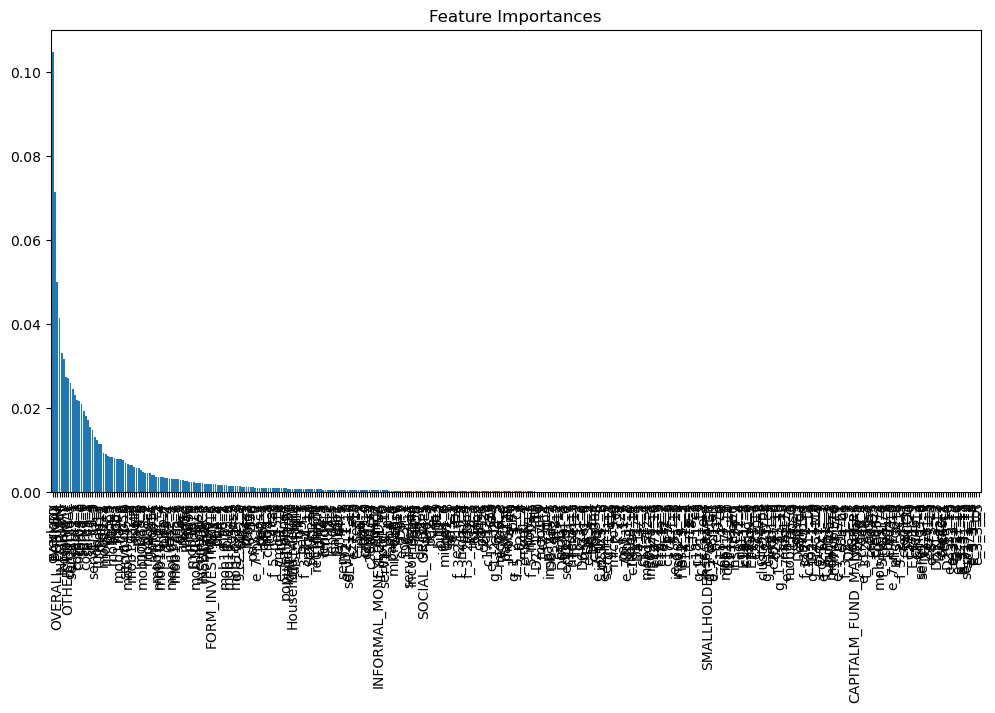

In [15]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

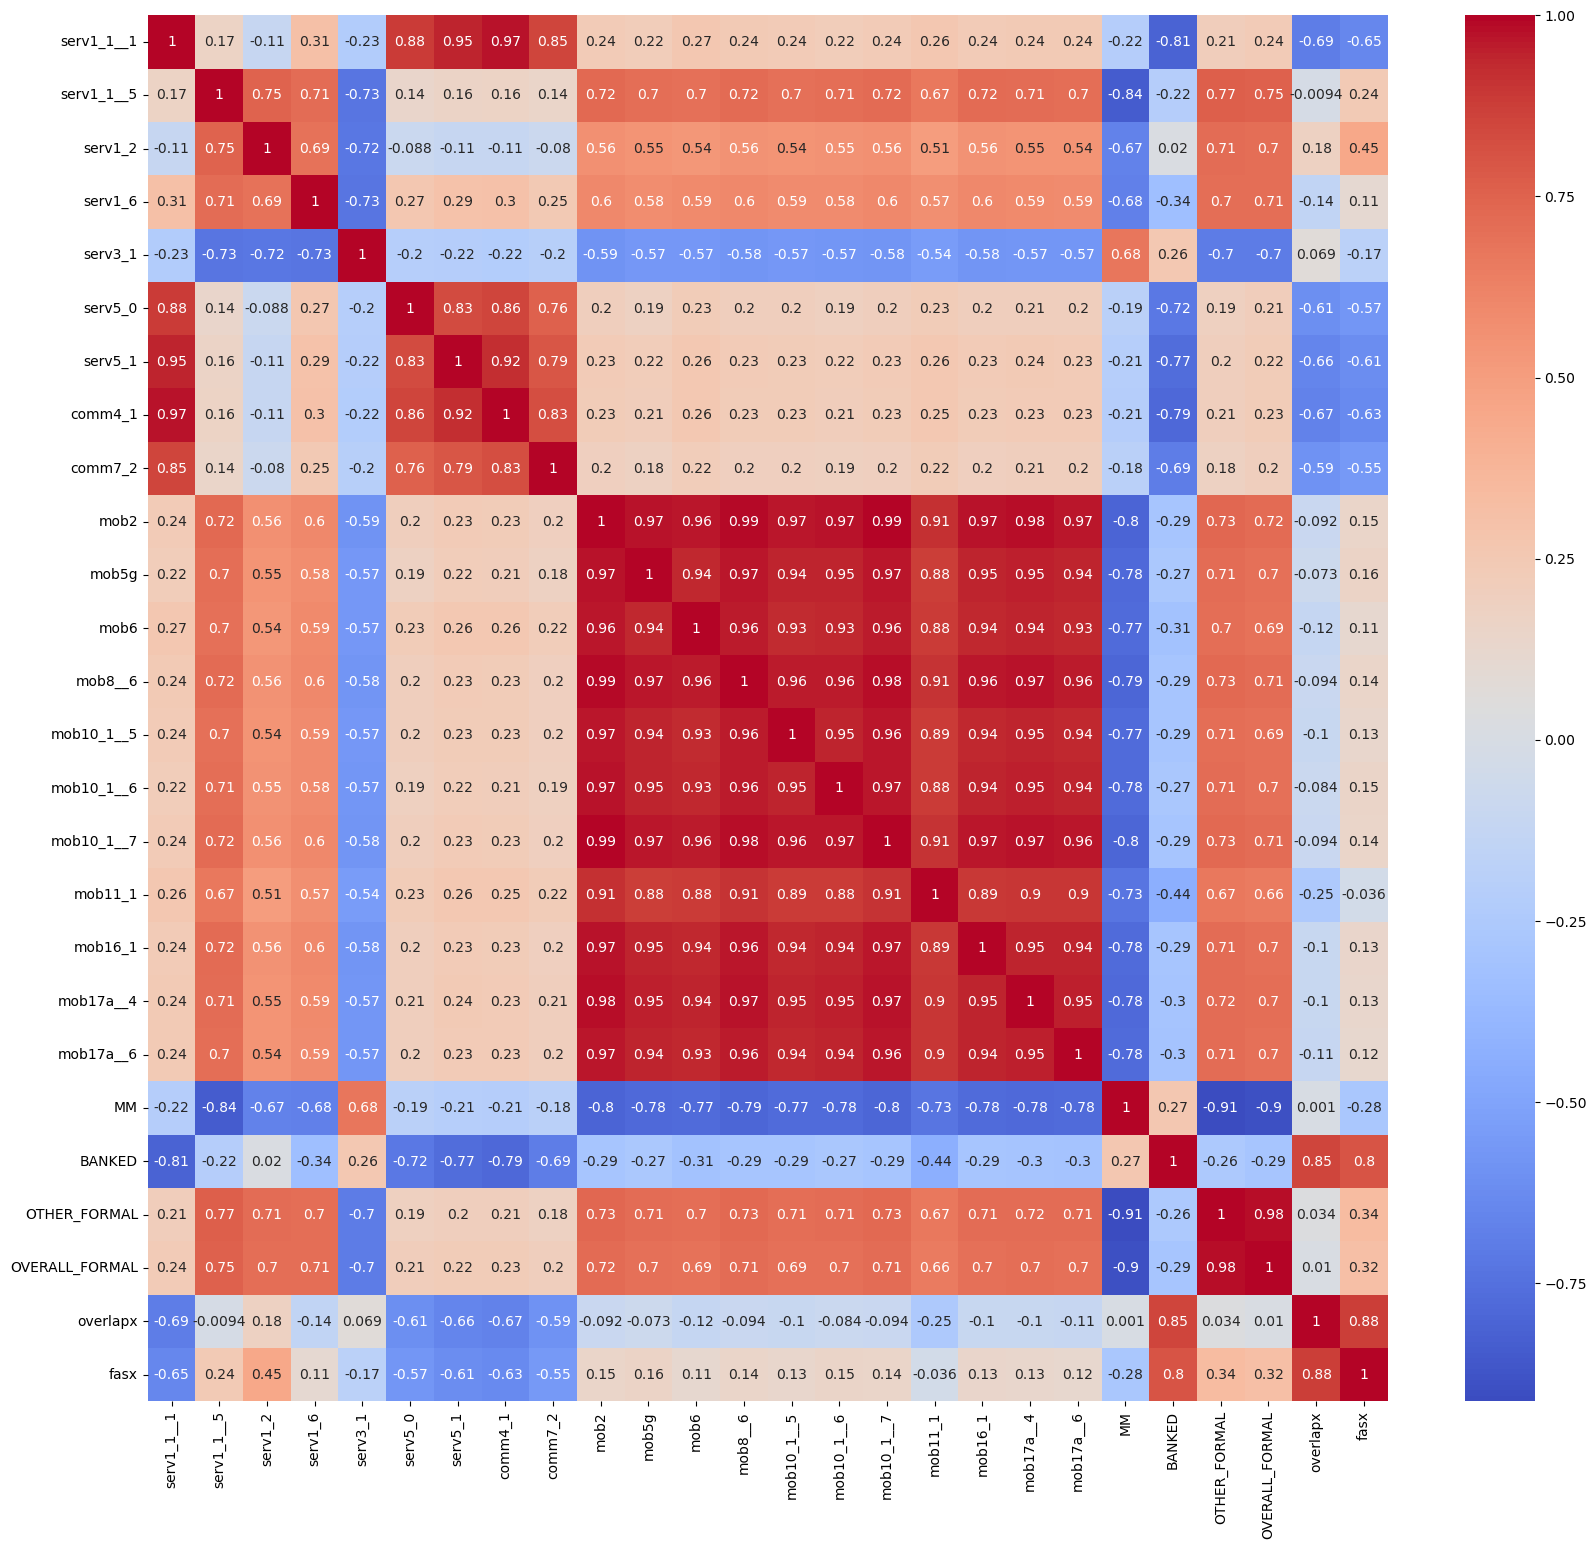

In [20]:
# Correlation matrix
plt.figure(figsize=(20, 18))
correlation_matrix = main_df[selected_features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
#to avoid multicollinearity we drop 'banked', 'overlapx' features
main_df.drop(columns=['BANKED', 'overlapx', 'serv1_2'], inplace=True)

In [28]:
from sklearn.decomposition import PCA

# Initialize PCA, you can specify the number of components or use 'None' to retain all
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(df_new)

# Convert to DataFrame for better understanding
principal_df = pd.DataFrame(data=principal_components)

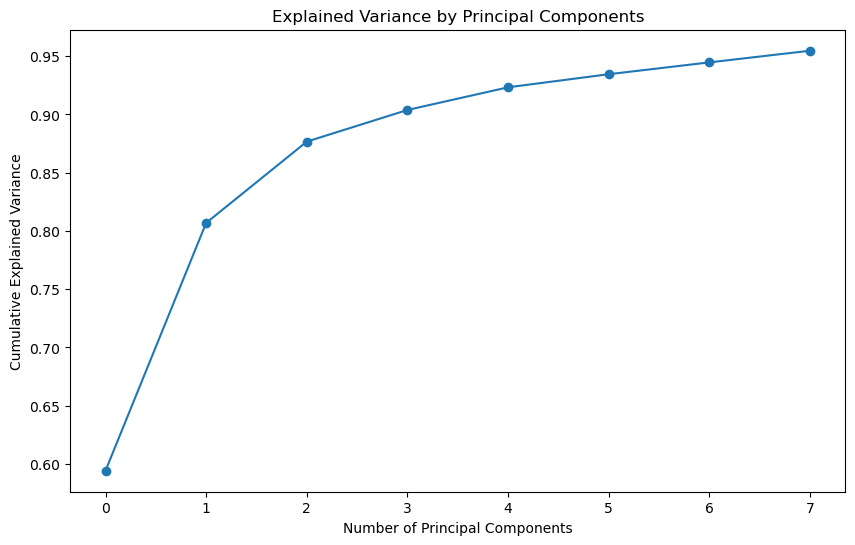

In [29]:
# Analyze the Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [31]:
principal_df

,0,1,2,3,4,5,6,7
0,2.704768,-1.834475,-0.026805,0.109179,-0.170602,0.485008,0.080071,0.049275
1,-3.337871,-0.380420,3.013850,0.596015,-0.413108,-1.397026,0.543452,1.397093
2,2.510040,-1.667792,-0.116168,0.210611,-0.399939,-1.324410,0.454753,1.316855
3,2.337139,-1.638347,-0.002035,0.227399,-0.359945,-1.305448,0.454697,1.315018
4,3.295901,-1.792341,-0.182380,0.208319,-0.469417,-0.508475,0.131492,-0.160444
...,...,...,...,...,...,...,...,...
9910,-5.572467,0.552099,-1.026754,0.348275,-0.260950,0.105563,-0.022443,-0.109297
9911,-5.572467,0.552099,-1.026754,0.348275,-0.260950,0.105563,-0.022443,-0.109297
9912,-2.765888,-0.555908,3.257708,0.010448,0.724184,0.658003,-0.145858,-0.417580
9913,-5.690040,0.218048,-1.069302,-0.359596,-0.325338,-0.096919,0.086599,-0.283888


In [32]:
original_features = pca.inverse_transform(principal_components)
original_df = pd.DataFrame(data=principal_components)

In [33]:
original_df

,0,1,2,3,4,5,6,7
0,2.704768,-1.834475,-0.026805,0.109179,-0.170602,0.485008,0.080071,0.049275
1,-3.337871,-0.380420,3.013850,0.596015,-0.413108,-1.397026,0.543452,1.397093
2,2.510040,-1.667792,-0.116168,0.210611,-0.399939,-1.324410,0.454753,1.316855
3,2.337139,-1.638347,-0.002035,0.227399,-0.359945,-1.305448,0.454697,1.315018
4,3.295901,-1.792341,-0.182380,0.208319,-0.469417,-0.508475,0.131492,-0.160444
...,...,...,...,...,...,...,...,...
9910,-5.572467,0.552099,-1.026754,0.348275,-0.260950,0.105563,-0.022443,-0.109297
9911,-5.572467,0.552099,-1.026754,0.348275,-0.260950,0.105563,-0.022443,-0.109297
9912,-2.765888,-0.555908,3.257708,0.010448,0.724184,0.658003,-0.145858,-0.417580
9913,-5.690040,0.218048,-1.069302,-0.359596,-0.325338,-0.096919,0.086599,-0.283888


In [35]:
print("Original Data:")
print(df_new.head())
print("\nReconstructed Data:")
print(pd.DataFrame(original_features, columns=df_new.columns).head())

Original Data:
   J1.1.Use sometimes_Banks  J1.1.Use sometimes_Mobile money agents  \
0                 -0.412371                                0.759317   
1                 -0.412371                               -1.316973   
2                 -0.412371                               -1.316973   
3                 -0.412371                               -1.316973   
4                 -0.412371                                0.759317   

   J1.2.Which of these would feel most important to use for managing money?  \
0                                           1.436216                          
1                                           1.436216                          
2                                           1.436216                          
3                                           1.436216                          
4                                           0.689868                          

   J1.6.Do you know where to report your issues or complaints with(%serv1_5%)?  \
0

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'fasx'

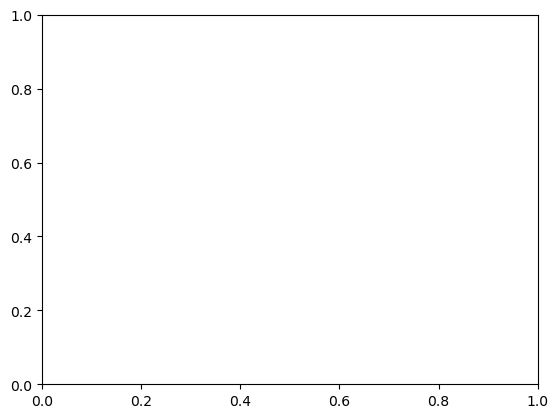

In [40]:
# Create a biplot
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=target)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

# Plot the biplot
myplot(principal_components[:, :2], pca.components_.T, labels=df_new.columns)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot: Feature Importance in PCA")
plt.show()

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(principal_components, target, test_size=0.2, random_state=42)

# # Train a model (e.g., RandomForest)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Make predictions and evaluate
# predictions = model.predict(X_test)
# accuracy = accuracy_score(y_test, predictions)
# print(f"Model Accuracy: {accuracy}")

ValueError: Found input variables with inconsistent numbers of samples: [9915, 4]

In [41]:
# feature standardization of original set
data_cols = data.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [42]:
# applying labels from the dataset dictionary to give our new dataframe columns names we can understand

data = pd.DataFrame(data, columns=data_cols)
data = data.rename(columns=label_dict)
data

,Mobile_phone,Internet,PC,Simcard,NationalID,Own_phone,Smart_phone,USSD_info,USSD_transfers,USSD_payments,Mobile_Money,Inclusion_code,Overlap
0,0.411868,1.571382,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514
1,-2.427961,-0.632020,-0.251201,-1.767105,-1.540254,-1.742714,-1.440664,-1.653957,-1.572830,-1.478711,1.567134,-0.572575,0.214514
2,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514
3,0.411868,-0.632020,-0.251201,0.565897,-0.331100,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514
4,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,-2.427961,-0.632020,-0.251201,-1.767105,-1.540254,-1.742714,-1.440664,-1.653957,-1.572830,-1.478711,1.567134,1.746495,-0.292859
9911,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,-0.396056,0.244743,1.567134,1.746495,-0.292859
9912,0.411868,1.571382,-0.251201,0.565897,0.878054,0.573818,1.705978,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514
9913,0.411868,-0.632020,-0.251201,0.565897,-0.331100,0.573818,0.132657,0.665724,-0.396056,0.244743,1.567134,1.746495,0.721888


In [43]:
data = pd.concat([data, df_new[['J1.1.Use sometimes_Mobile money agents', '2.Are you currently using mobile money?', '5.a.7. You borrowed digital loan money to improve your life, but the debt made you worse off', '8.Which mobile money services do you use?_T-pesa', '10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Lost money', '10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Agent wanted you to reveal your PIN number', '10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Any other problem', '11.1.Have you ever borrowed money through mobile money services?', '16.1.Have you ever used a mobile money agent?', '17a.In the past 12 months, which of the following actions have you done using your mobile money account?_Fundraise', '17a.In the past 12 months, which of the following actions have you done using your mobile money account?_Betting/Lottery']]], axis=1)
data

,Mobile_phone,Internet,PC,Simcard,NationalID,Own_phone,Smart_phone,USSD_info,USSD_transfers,USSD_payments,Mobile_Money,Inclusion_code,Overlap,J1.1.Use sometimes_Mobile money agents,2.Are you currently using mobile money?,"5.a.7. You borrowed digital loan money to improve your life, but the debt made you worse off",8.Which mobile money services do you use?_T-pesa,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Lost money,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Agent wanted you to reveal your PIN number,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Any other problem,11.1.Have you ever borrowed money through mobile money services?,16.1.Have you ever used a mobile money agent?,"17a.In the past 12 months, which of the following actions have you done using your mobile money account?_Fundraise","17a.In the past 12 months, which of the following actions have you done using your mobile money account?_Betting/Lottery"
0,0.411868,1.571382,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514,0.759317,0.796568,0.840517,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525
1,-2.427961,-0.632020,-0.251201,-1.767105,-1.540254,-1.742714,-1.440664,-1.653957,-1.572830,-1.478711,1.567134,-0.572575,0.214514,-1.316973,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733
2,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514,-1.316973,0.796568,0.840517,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525
3,0.411868,-0.632020,-0.251201,0.565897,-0.331100,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514,-1.316973,0.796568,0.840517,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525
4,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514,0.759317,0.796568,0.840517,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,2.660784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,-2.427961,-0.632020,-0.251201,-1.767105,-1.540254,-1.742714,-1.440664,-1.653957,-1.572830,-1.478711,1.567134,1.746495,-0.292859,-1.316973,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733
9911,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,-0.396056,0.244743,1.567134,1.746495,-0.292859,-1.316973,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733
9912,0.411868,1.571382,-0.251201,0.565897,0.878054,0.573818,1.705978,0.665724,0.780718,0.244743,-0.638108,-0.572575,0.214514,0.759317,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733
9913,0.411868,-0.632020,-0.251201,0.565897,-0.331100,0.573818,0.132657,0.665724,-0.396056,0.244743,1.567134,1.746495,0.721888,-1.316973,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733


In [52]:
data.drop(columns=['Inclusion_code'], inplace=True)
data = pd.concat([data, data1[['Inclusion_code']]], axis=1)
data

,Mobile_phone,Internet,PC,Simcard,NationalID,Own_phone,Smart_phone,USSD_info,USSD_transfers,USSD_payments,Mobile_Money,Overlap,J1.1.Use sometimes_Mobile money agents,2.Are you currently using mobile money?,"5.a.7. You borrowed digital loan money to improve your life, but the debt made you worse off",8.Which mobile money services do you use?_T-pesa,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Lost money,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Agent wanted you to reveal your PIN number,10.1.In the past 12 months have you experienced any of the following when you wanted to use mobile money?_Any other problem,11.1.Have you ever borrowed money through mobile money services?,16.1.Have you ever used a mobile money agent?,"17a.In the past 12 months, which of the following actions have you done using your mobile money account?_Fundraise","17a.In the past 12 months, which of the following actions have you done using your mobile money account?_Betting/Lottery",Inclusion_code
0,0.411868,1.571382,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,0.214514,0.759317,0.796568,0.840517,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525,0
1,-2.427961,-0.632020,-0.251201,-1.767105,-1.540254,-1.742714,-1.440664,-1.653957,-1.572830,-1.478711,1.567134,0.214514,-1.316973,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,0
2,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,0.214514,-1.316973,0.796568,0.840517,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525,0
3,0.411868,-0.632020,-0.251201,0.565897,-0.331100,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,0.214514,-1.316973,0.796568,0.840517,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,0.721525,0
4,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,0.780718,0.244743,-0.638108,0.214514,0.759317,0.796568,0.840517,0.776685,0.71164,0.723702,0.779616,0.545331,0.870425,0.742836,2.660784,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,-2.427961,-0.632020,-0.251201,-1.767105,-1.540254,-1.742714,-1.440664,-1.653957,-1.572830,-1.478711,1.567134,-0.292859,-1.316973,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,1
9911,0.411868,-0.632020,-0.251201,0.565897,0.878054,0.573818,0.132657,0.665724,-0.396056,0.244743,1.567134,-0.292859,-1.316973,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,1
9912,0.411868,1.571382,-0.251201,0.565897,0.878054,0.573818,1.705978,0.665724,0.780718,0.244743,-0.638108,0.214514,0.759317,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,0
9913,0.411868,-0.632020,-0.251201,0.565897,-0.331100,0.573818,0.132657,0.665724,-0.396056,0.244743,1.567134,0.721888,-1.316973,-1.255386,-1.222031,-1.245061,-1.21305,-1.218773,-1.246568,-1.145401,-1.219734,-1.228055,-1.217733,1


In [53]:
target = 'Inclusion_code'
features = data.drop(columns=[target]).columns

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_val = logreg.predict(X_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

95.8

Logistic Regression Model Accuracy: 95.61
Training Precision: 0.86
Testing Precision: 0.84
Training Recall: 1.00
Testing Recall: 1.00


Text(0, 0.5, 'Accuracy')

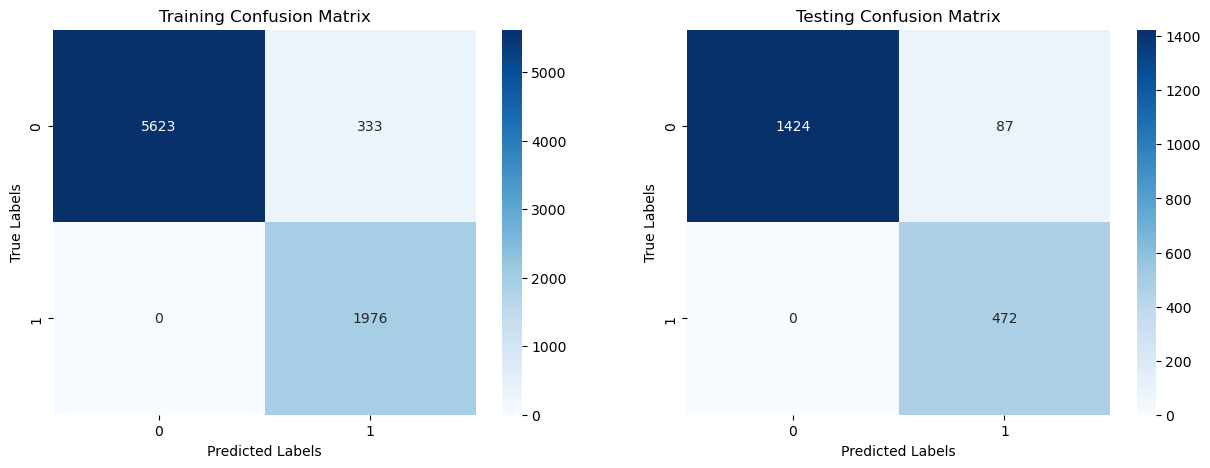

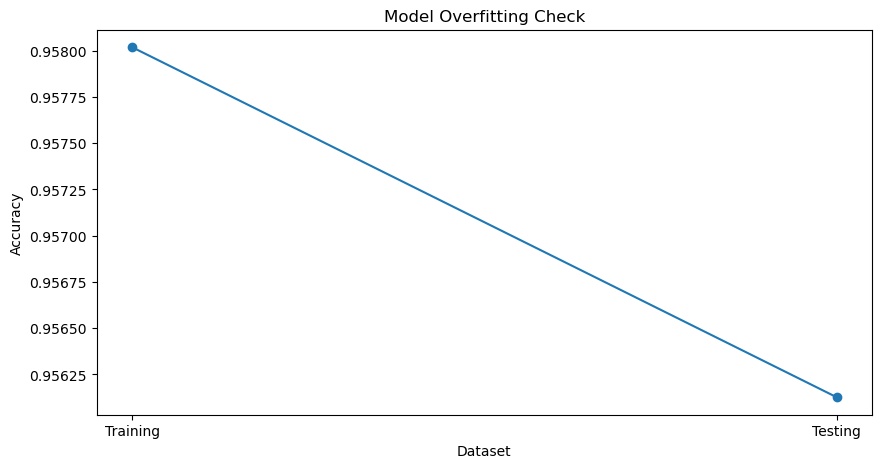

In [54]:
# full picture of our Logistic Regression Model performance using accuracy, precision, recall and confusion matrix scores.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

train_accuracy = accuracy_score(y_train, pred_val)
test_accuracy = accuracy_score(y_test, Y_pred)

train_precision = precision_score(y_train, pred_val)
test_precision = precision_score(y_test, Y_pred)

train_recall = recall_score(y_train, pred_val)
test_recall = recall_score(y_test, Y_pred)

train_CM = confusion_matrix(y_train, pred_val)
test_CM = confusion_matrix(y_test, Y_pred)

# plots and output metrics 
print(f"Logistic Regression Model Accuracy: {round(test_accuracy * 100, 2)}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(train_CM, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
sns.heatmap(test_CM, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Testing Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.figure(figsize=(10, 5 ))
plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o')
plt.title('Model Overfitting Check')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

In [65]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)
pred_val = svc.predict(X_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

96.33

SVM Model Accuracy: 96.12
Training Precision: 0.87
Testing Precision: 0.86
Training Recall: 1.00
Testing Recall: 1.00


Text(0, 0.5, 'Accuracy')

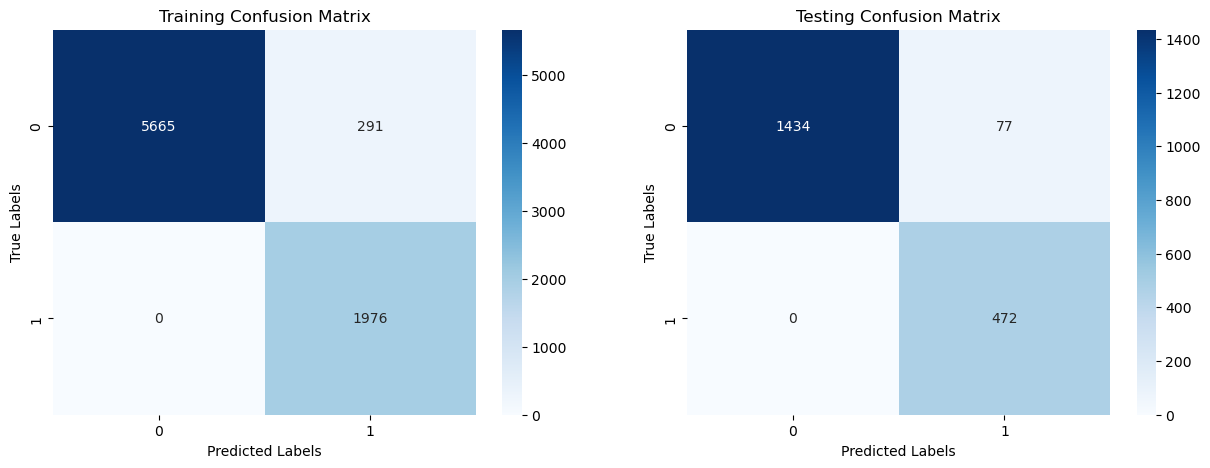

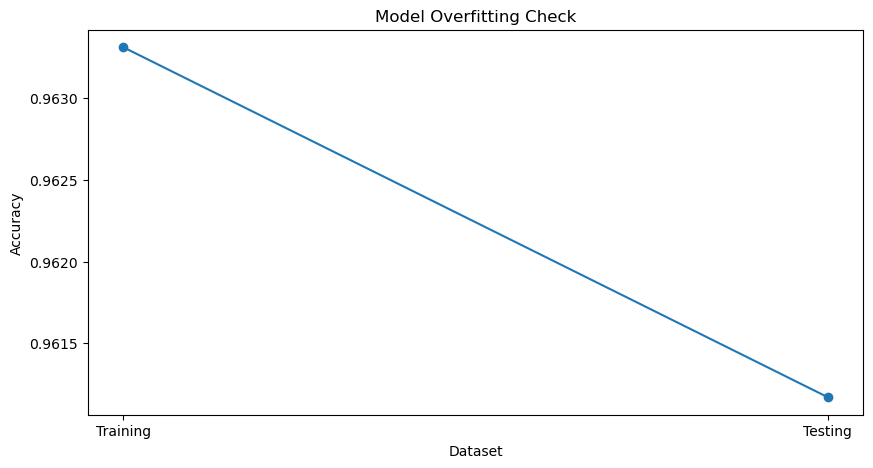

In [61]:
train_accuracy = accuracy_score(y_train, pred_val)
test_accuracy = accuracy_score(y_test, Y_pred)

train_precision = precision_score(y_train, pred_val)
test_precision = precision_score(y_test, Y_pred)

train_recall = recall_score(y_train, pred_val)
test_recall = recall_score(y_test, Y_pred)

train_CM = confusion_matrix(y_train, pred_val)
test_CM = confusion_matrix(y_test, Y_pred)

# plots and output metrics 
print(f"SVM Model Accuracy: {round(test_accuracy * 100, 2)}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Testing Recall: {test_recall:.2f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(train_CM, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Training Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
sns.heatmap(test_CM, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Testing Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.figure(figsize=(10, 5 ))
plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o')
plt.title('Model Overfitting Check')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

In [62]:
# Create Decision Tree classifier object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)

# Print the accuracy score
print(f"Decision Tree Accuracy: {acc_decision_tree}%")


Decision Tree Accuracy: 100.0%


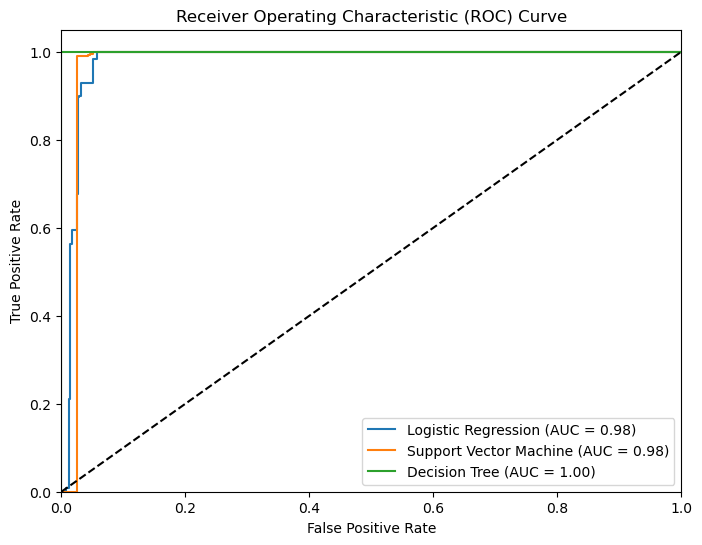

In [66]:
# here we compare the performance of the three classifiers based on the AUC of their ROC curves.
# AUC,the Area Under the Curve, is a performance measurement for classification models used in conjuction with Receiver Operating Characteristic (ROC) curve. AUC = 1 perfect model, AUC = 0.5 No discrimination ability, AUC < 0.5 worse than random guessing
# AUC is useful in threshold invariance and robust to class imbalance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob_log_reg = logreg.predict_proba(X_test)[:, 1]
y_prob_svc = svc.predict_proba(X_test)[:, 1]
y_prob_decision_tree = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC values
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob_decision_tree)

auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_svc = auc(fpr_svc, tpr_svc)
auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine (AUC = {auc_svc:.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_decision_tree:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()